### Load packages

In [1]:
dep_packages <- c("caret",
                  "pROC", 
                  "SHAPforxgboost",
                  "ggplot2",
                  "xgboost",
                  "data.table",
                  "here",
                  "randomForest",
                  "reprtree",
                  "dplyr",
                  "ggraph",
                  "igraph",
                  "neuralnet",
                  "devtools",
                  "e1071") 
new.packages <- dep_packages[!(dep_packages %in% installed.packages()[,"Package"])] 
if(length(new.packages)) install.packages(new.packages)
lapply(dep_packages, require, character.only = TRUE)

Loading required package: caret

Loading required package: ggplot2

Loading required package: lattice

Loading required package: pROC

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


Loading required package: SHAPforxgboost

Loading required package: xgboost

Loading required package: data.table

Loading required package: here

here() starts at C:/Users/wujin/Desktop/Sepsis-death-prediction-main

Loading required package: randomForest

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


Loading required package: reprtree

Loading required package: tree

Loading required package: plotrix

Registered S3 method overwritten by 'reprtree':
  method    from
  text.tree tree

Loading required package: dplyr


Attaching package: 'dplyr'


The following object is mask

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

### Read the dataset

In [2]:
sepsisdata=read.csv("sepsis data.csv",header=TRUE,sep=",")
features=colnames(sepsisdata, do.NULL = TRUE, prefix = "col")
features
death=sepsisdata[,222] ## define outcome
table(death)

[1] "age"                 "tmp"                 "pulse_center100"    
  [4] "sbp_center120"       "dbp_center75"        "rr_center18"        
  [7] "spao2"               "map_center100"       "gcs"                
 [10] "angiopoietin2_norm"  "il6_norm"            "tnfa_norm"          
 [13] "scd163_norm"         "il10_norm"           "pentraxin3_norm"    
 [16] "ifnr_norm"           "il8_norm"            "cd14_norm"          
 [19] "trem1_norm"          "cd64_norm"           "icam1_norm"         
 [22] "eselectin_norm"      "pselectin_norm"      "vcam1_norm"         
 [25] "sugar_fs_center180"  "pct"                 "crp"                
 [28] "lactate"             "alb"                 "aptt_center30"      
 [31] "pt"                  "inr"                 "bilt"               
 [34] "bun"                 "ast"                 "inorp_center3"      
 [37] "tro"                 "ddimer"              "cortisol"           
 [40] "ca_center8.75"       "cl"                  "uric"               
 [43] "c3"                  "proteinc_center75"   "po2"                
 [46] "sat"                 "hco3_center25"       "pco2"               
 [49] "ph"                  "tco2"                "abe"                
 [52] "aado2"               "fio2"                "sbc"                
 [55] "sbe"                 "fdp"                 "band"               
 [58] "cre"                 "eos"                 "hb"                 
 [61] "hct"                 "mchc"                "mcv"                
 [64] "plt"                 "rbc"                 "rdw"                
 [67] "wbc_center15"        "K"                   "Na"                 
 [70] "high_blood_pressure" "asthma"              "gout"               
 [73] "parkinson"           "hiv"                 "stroke"             
 [76] "allergy"             "misum"               "chfsum"             
 [79] "pvdsum"              "cdsum"               "dementia"           
 [82] "cpdsum"              "rdsum"               "pudsum"             
 [85] "mldsum"              "hopsum"              "renalsum"           
 [88] "leukemiasum"         "lymphomasum"         "msldsum"            
 [91] "mstsum"              "tumorsum"            "ckdsum"             
 [94] "carriersum"          "flsum"               "cirrhosissum"       
 [97] "liversum"            "copd_final_sum"      "malignancy_final"   
[100] "dm_final"            "res_infection"       "gu_infection"       
[103] "skin_infection"      "abdominal_infection" "cns_infection"      
[106] "msk_infection"       "other_infection"     "card_dysfunction"   
[109] "res_dysfunction"     "gt_dysfunction"      "ren_dysfunction"    
[112] "hep_dysfunction"     "neu_dysfunction"     "met_dysfunction"    
[115] "hem_dysfunction"     "sofa_score"          "sofa_sepsis"        
[118] "sofa_sep_shock"      "gene_sore"           "musc_sore"          
[121] "convulsion"          "gene_weak"           "chills"             
[124] "shak_chil"           "cyanosis"            "fever"              
[127] "sweat"               "no_sweat"            "dry_lips"           
[130] "thirsty"             "cold_extr"           "malaise"            
[133] "drawsy"              "syncope"             "confusion"          
[136] "tachycardia"         "agitation"           "acut_conf"          
[139] "fluc_cour"           "inattention"         "diso_thin"          
[142] "urin_freq"           "oliguria"            "hematuria"          
[145] "diff_void"           "dysuria"             "flan_pain"          
[148] "headache"            "dizziness"           "sore_thro"          
[151] "ches_tigh"           "dyspnea"             "ches_pain"          
[154] "neck_pain"           "nasa_cong"           "sneezing"           
[157] "runn_nose"           "dry_coug"            "prod_coug"          
[160] "sputum"              "hemoptysis"          "abdo_dist"          
[163] "abdo_pain"           "diarrhea"            "constipation"       
[166] "nausea"              "vomit"       

death
  0   1 
510  45 

### Data pre-processing

### Imputing missing values

#### Continuous Variables

In [3]:
sepsisdata_conti<-sepsisdata[,1:69]
dim(sepsisdata_conti)

for(i in 1:ncol(sepsisdata_conti)){
  sepsisdata_conti[is.na(sepsisdata_conti[,i]), i] <- median(sepsisdata_conti[,i], na.rm = TRUE) ## Replacing NA with median value
}
str(sepsisdata_conti)

[1] 555  69

'data.frame':	555 obs. of  69 variables:
 $ age               : int  78 73 71 42 89 77 92 78 63 58 ...
 $ tmp               : num  37.6 36.9 38.3 36 38.3 ...
 $ pulse_center100   : int  121 225 9 1 1849 0 576 81 196 256 ...
 $ sbp_center120     : int  2304 1156 49 100 1521 961 441 625 529 9 ...
 $ dbp_center75      : int  225 289 289 1 169 441 9 400 4 144 ...
 $ rr_center18       : num  144 25 1 0 64 36 36 0 100 1 ...
 $ spao2             : num  91 91 89 92 90 91 74 99 73 98 ...
 $ map_center100     : num  256 1067 361 196 136 ...
 $ gcs               : int  15 15 15 15 4 15 10 15 15 15 ...
 $ angiopoietin2_norm: num  0.0187 0.0251 0.0485 0.0112 0.0491 ...
 $ il6_norm          : num  0.000284 0.00118 0.000429 0.000738 0.000545 ...
 $ tnfa_norm         : num  0.0229 0.115 0.0556 0.0639 0.0837 ...
 $ scd163_norm       : num  0.7062 0.4014 0.0996 0.1907 0.1487 ...
 $ il10_norm         : num  7.71e-04 3.40e-14 1.89e-04 3.40e-14 3.98e-03 ...
 $ pentraxin3_norm   : num  0.4528 0.0674 0.0673 

#### Normalization by z score

In [4]:
sepsisdata_conti<-as.data.frame(scale(sepsisdata_conti))
length(which(is.na(sepsisdata_conti)))

[1] 0

#### Categorical Variables

In [5]:
sepsisdata_cate<-sepsisdata[, 70:221]
sepsisdata_cate[sepsisdata_cate=="?"]<- NA
length(which(is.na(sepsisdata_cate)))

sepsisdata_cate[is.na(sepsisdata_cate)] <- 0  ### Replacing NA with 0 (問卷,症狀,或共病)
length(which(is.na(sepsisdata_cate)))

[1] 23

[1] 0

### Combining Data after pre-processing

In [6]:
mydata<-cbind(death, sepsisdata_conti, sepsisdata_cate)
table(mydata$death)
mydata$death_binary=ifelse(mydata$death=="0","Survive","Death")
mydata=mydata[,-1]
mydata$death_binary=as.factor(mydata$death_binary)
table(mydata$death_binary)


  0   1 
510  45 


  Death Survive 
     45     510 

###  Model derivation

#### Data partitioning by stratified method ###########

In [7]:
mydata1=mydata[which(mydata$death_binary=="Survive"),]
mydata2=mydata[which(mydata$death_binary=="Death"),]
index1=sample(dim(mydata1)[1],nrow(mydata1)*0.3)
index2=sample(dim(mydata2)[1],nrow(mydata2)*0.3)
testing=rbind(mydata1[index1,],mydata2[index2,])
training=rbind(mydata1[-index1,],mydata2[-index2,])
##smote_train<-SMOTE(death_binary~.,data=training)
table(training$death_binary)
##table(smote_train$death_binary)
dim(training)


  Death Survive 
     32     357 

[1] 389 222

#### Cross validation method: 5 numbers with 5 repeatation

In [8]:
fitControl=trainControl(method="repeatedcv",
                        number=5,
                        repeats=5,
                        verbose = FALSE,
                        classProbs = TRUE,
                        summaryFunction=twoClassSummary,
                        search="random")

###  Machine learning-based models 

###   Random Forest MODEL 

In [9]:
rfmodelfit<-train(death_binary ~ .,
                  data=training,
                  ## data=smote_train,
                  method="rf",
                  metric="ROC",
                  tuneLength=10,
                  trControl=fitControl)

rfmodelfit

predictions_train=predict(rfmodelfit,newdata=training)
predictions_test=predict(rfmodelfit,newdata=testing)
confusionMatrix(predict(rfmodelfit,training),training$death)
confusionMatrix(predict(rfmodelfit,testing),testing$death)

train_results=predict(rfmodelfit,training,type="prob")
test_results=predict(rfmodelfit,testing,type="prob")
train_results$obs=training$death
train_results$pred=predictions_train
test_results$obs=testing$death
test_results$pred=predictions_test
ROC_train<-roc(training$death,train_results[,"Death"],levels=c("Survive","Death"))
ROC_test<-roc(testing$death,test_results[,"Death"],levels=c("Survive","Death"))
ROC_train
ci.auc(ROC_train)
ROC_test
ci.auc(ROC_test)

Random Forest 

389 samples
221 predictors
  2 classes: 'Death', 'Survive' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 311, 312, 311, 311, 311, 311, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
   23   0.8432665  0.1876190  0.9983177
   38   0.8373465  0.2009524  0.9977621
   55   0.8237091  0.2400000  0.9983177
  131   0.8075617  0.2514286  0.9910250
  132   0.8143698  0.2257143  0.9938263
  148   0.8119231  0.2447619  0.9921440
  160   0.8124302  0.2647619  0.9938341
  168   0.8103052  0.2514286  0.9915806

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 23.

Confusion Matrix and Statistics

          Reference
Prediction Death Survive
   Death      32       0
   Survive     0     357
                                     
               Accuracy : 1          
                 95% CI : (0.9906, 1)
    No Information Rate : 0.9177     
    P-Value [Acc > NIR] : 3.144e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.00000    
            Specificity : 1.00000    
         Pos Pred Value : 1.00000    
         Neg Pred Value : 1.00000    
             Prevalence : 0.08226    
         Detection Rate : 0.08226    
   Detection Prevalence : 0.08226    
      Balanced Accuracy : 1.00000    
                                     
       'Positive' Class : Death      
                                     

Confusion Matrix and Statistics

          Reference
Prediction Death Survive
   Death       3       2
   Survive    10     151
                                          
               Accuracy : 0.9277          
                 95% CI : (0.8771, 0.9621)
    No Information Rate : 0.9217          
    P-Value [Acc > NIR] : 0.45860         
                                          
                  Kappa : 0.303           
                                          
 Mcnemar's Test P-Value : 0.04331         
                                          
            Sensitivity : 0.23077         
            Specificity : 0.98693         
         Pos Pred Value : 0.60000         
         Neg Pred Value : 0.93789         
             Prevalence : 0.07831         
         Detection Rate : 0.01807         
   Detection Prevalence : 0.03012         
      Balanced Accuracy : 0.60885         
                                          
       'Positive' Class : Death           
            

Setting direction: controls < cases

Setting direction: controls < cases




Call:
roc.default(response = training$death, predictor = train_results[,     "Death"], levels = c("Survive", "Death"))

Data: train_results[, "Death"] in 357 controls (training$death Survive) < 32 cases (training$death Death).
Area under the curve: 1

Warning message in ci.auc.roc(ROC_train):
"ci.auc() of a ROC curve with AUC == 1 is always 1-1 and can be misleading."


95% CI: 1-1 (DeLong)


Call:
roc.default(response = testing$death, predictor = test_results[,     "Death"], levels = c("Survive", "Death"))

Data: test_results[, "Death"] in 153 controls (testing$death Survive) < 13 cases (testing$death Death).
Area under the curve: 0.8753

95% CI: 0.7743-0.9764 (DeLong)

#### Plot ROC Curve for Random Forest MODEL

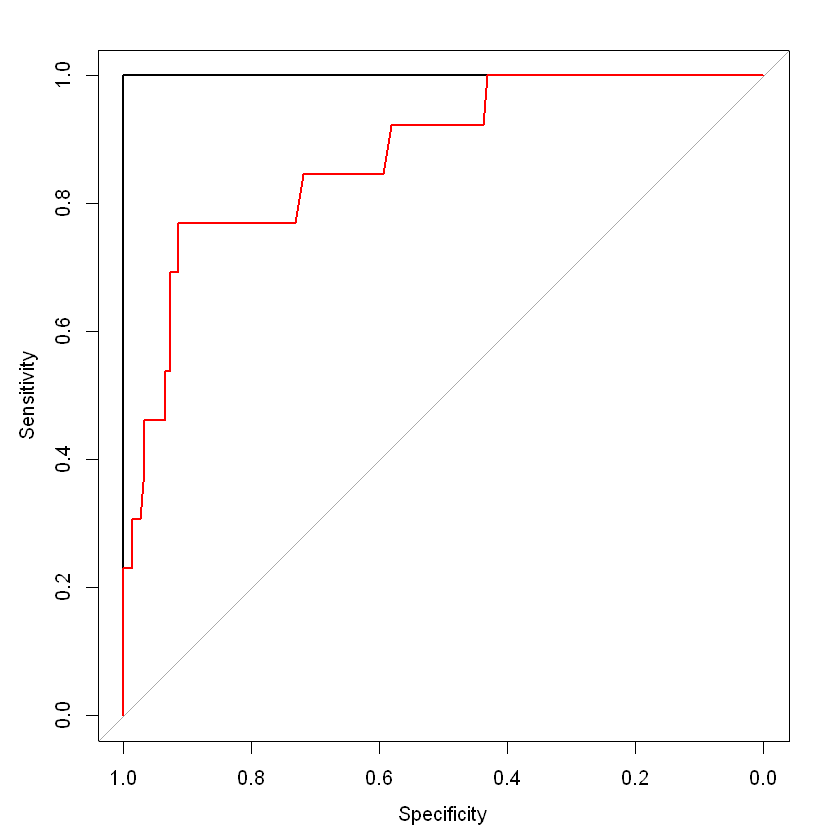

In [10]:
plot(ROC_train)
plot(ROC_test,add=TRUE,col="red")

### Visualize the tree

In [11]:
model <- randomForest(death_binary ~ .,
                      data=training,
                      importance=TRUE,
                      ntree=500,
                      mtry = 2,
                      do.trace=100)

ntree      OOB      1      2
  100:   8.23%100.00%  0.00%
  200:   8.23%100.00%  0.00%
  300:   8.23%100.00%  0.00%
  400:   8.23%100.00%  0.00%
  500:   8.23%100.00%  0.00%


Warning message:
"Duplicated aesthetics after name standardisation: na.rm"
Warning message:
"Duplicated aesthetics after name standardisation: na.rm"
Warning message:
"Duplicated aesthetics after name standardisation: na.rm"
Warning message:
"Removed 11 rows containing missing values (geom_text_repel)."
Warning message:
"Removed 11 rows containing missing values (geom_label)."
Warning message:
"Removed 10 rows containing missing values (geom_label_repel)."


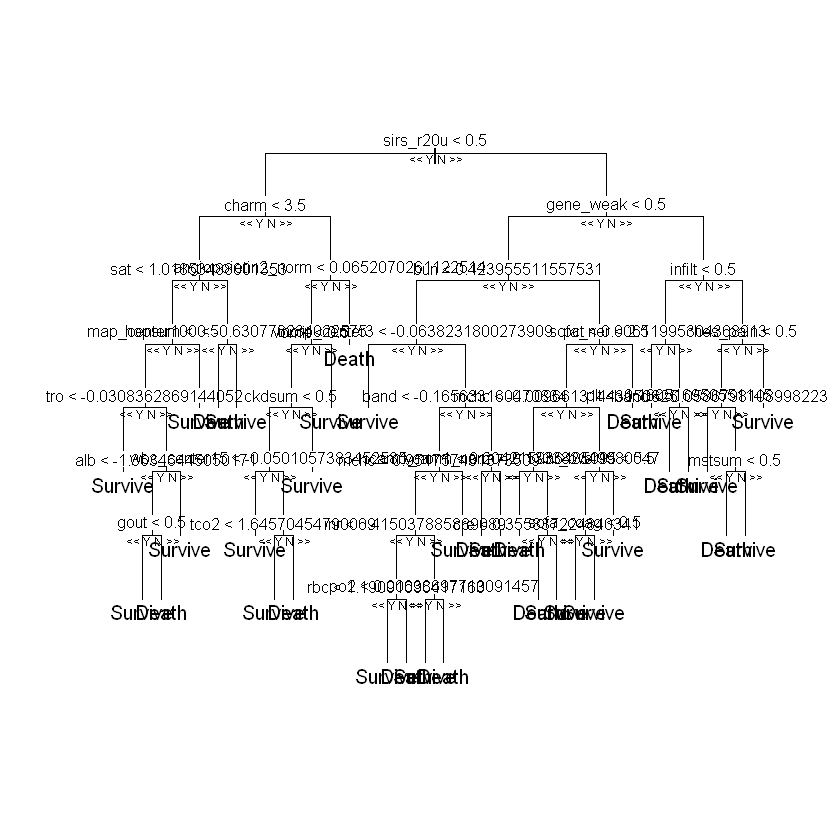

Warning message in if (k > rfobj$ntree) {:
"條件的長度 > 1，因此只能用其第一元素"
Warning message in cbind(rfobj$forest$treemap[, , k], rfobj$forest$bestvar[, k], :
"number of rows of result is not a multiple of vector length (arg 1)"
Warning message in 1:rfobj$forest$ndbigtree[k]:
"數值運算式一共有 2 個元素: 只用了第一個"


ERROR: Error in dimnames(tree) <- list(1:nrow(tree), c("left daughter", "right daughter", : 'dimnames' 的長度 [2] 必須與陣列範圍相等


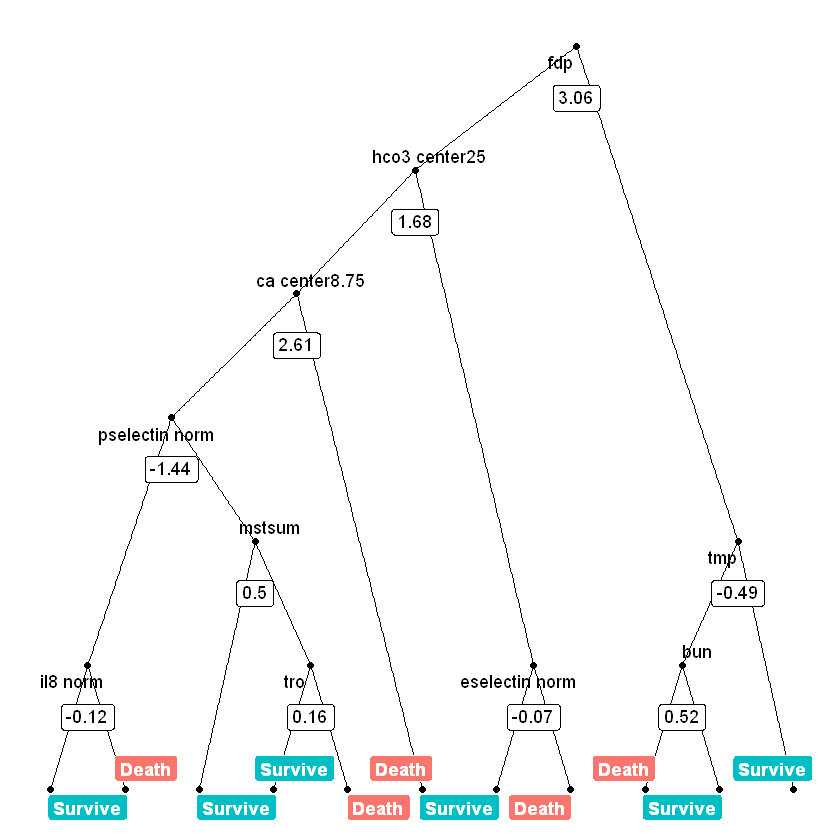

In [12]:
reprtree:::plot.getTree(model)

### Plotting trees from Random Forest models with ggraph
tree_func <- function(final_model,
                      tree_num) {

  # get tree by index
  tree <- randomForest::getTree(final_model,
                                k = tree_num,
                                labelVar = TRUE) %>%
    tibble::rownames_to_column() %>%
    # make leaf split points to NA, so the 0s won't get plotted
    mutate(`split point` = ifelse(is.na(prediction), `split point`, NA))

  # prepare data frame for graph
  graph_frame <- data.frame(from = rep(tree$rowname, 2),
                            to = c(tree$`left daughter`, tree$`right daughter`))

  # convert to graph and delete the last node that we don't want to plot
  graph <- graph_from_data_frame(graph_frame) %>%
    delete_vertices("0")

  # set node labels
  V(graph)$node_label <- gsub("_", " ", as.character(tree$`split var`))
  V(graph)$leaf_label <- as.character(tree$prediction)
  V(graph)$split <- as.character(round(tree$`split point`, digits = 2))

  # plot
  plot <- ggraph(graph, 'dendrogram') +
    theme_bw() +
    geom_edge_link() +
    geom_node_point() +
    geom_node_text(aes(label = node_label), na.rm = TRUE, repel = TRUE) +
    geom_node_label(aes(label = split), vjust = 2.5, na.rm = TRUE, fill = "white") +
    geom_node_label(aes(label = leaf_label, fill = leaf_label), na.rm = TRUE,
                    repel = TRUE, colour = "white", fontface = "bold", show.legend = FALSE) +
    theme(panel.grid.minor = element_blank(),
          panel.grid.major = element_blank(),
          panel.background = element_blank(),
          plot.background = element_rect(fill = "white"),
          panel.border = element_blank(),
          axis.line = element_blank(),
          axis.text.x = element_blank(),
          axis.text.y = element_blank(),
          axis.ticks = element_blank(),
          axis.title.x = element_blank(),
          axis.title.y = element_blank(),
          plot.title = element_text(size = 18))

  print(plot)
}

## plot the tree with the smaller number of nodes
tree_num <- which(rfmodelfit$finalModel$forest$ndbigtree == min(rfmodelfit$finalModel$forest$ndbigtree))
tree_func(final_model = rfmodelfit$finalModel, tree_num)

## plot the tree with the biggest number of nodes
tree_num <- which(rfmodelfit$finalModel$forest$ndbigtree == max(rfmodelfit$finalModel$forest$ndbigtree))
tree_func(final_model = rfmodelfit$finalModel, tree_num)

### CFOREST MODEL 

In [13]:
cforestmodelfit<-train(death_binary ~ .,
                       data=training,
                       method="cforest",
                       metric="ROC",
                       tuneLength=10,
                       trControl=fitControl)

cforestmodelfit

predictions_train=predict(cforestmodelfit,newdata=training)
predictions_test=predict(cforestmodelfit,newdata=testing)
confusionMatrix(predict(cforestmodelfit,training),training$death_binary)
confusionMatrix(predict(cforestmodelfit,testing),testing$death_binary)

train_results=predict(cforestmodelfit,training,type="prob")
test_results=predict(cforestmodelfit,testing,type="prob")
train_results$obs=training$death_binary
train_results$pred=predictions_train
test_results$obs=testing$death_binary
test_results$pred=predictions_test
ROC_train<-roc(training$death_binary,train_results[,"Death"],levels=c("Survive","Death"))
ROC_test<-roc(testing$death_binary,test_results[,"Death"],levels=c("Survive","Death"))
ROC_train
ci.auc(ROC_train)
ROC_test
ci.auc(ROC_test)

Conditional Inference Random Forest 

389 samples
221 predictors
  2 classes: 'Death', 'Survive' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 312, 312, 310, 310, 312, 311, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens        Spec     
    1   0.8770156  0.00000000  1.0000000
    3   0.8795253  0.00000000  1.0000000
    8   0.8789742  0.00000000  1.0000000
   30   0.8654781  0.03619048  1.0000000
   39   0.8678883  0.07428571  1.0000000
   52   0.8595922  0.11238095  1.0000000
   63   0.8558751  0.12571429  1.0000000
  113   0.8475628  0.20761905  0.9949844
  154   0.8429183  0.23904762  0.9910642
  219   0.8378085  0.26380952  0.9860172

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.

Confusion Matrix and Statistics

          Reference
Prediction Death Survive
   Death       0       0
   Survive    32     357
                                          
               Accuracy : 0.9177          
                 95% CI : (0.8859, 0.9431)
    No Information Rate : 0.9177          
    P-Value [Acc > NIR] : 0.5469          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 4.251e-08       
                                          
            Sensitivity : 0.00000         
            Specificity : 1.00000         
         Pos Pred Value :     NaN         
         Neg Pred Value : 0.91774         
             Prevalence : 0.08226         
         Detection Rate : 0.00000         
   Detection Prevalence : 0.00000         
      Balanced Accuracy : 0.50000         
                                          
       'Positive' Class : Death           
            

Confusion Matrix and Statistics

          Reference
Prediction Death Survive
   Death       0       0
   Survive    13     153
                                          
               Accuracy : 0.9217          
                 95% CI : (0.8698, 0.9576)
    No Information Rate : 0.9217          
    P-Value [Acc > NIR] : 0.5731055       
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 0.0008741       
                                          
            Sensitivity : 0.00000         
            Specificity : 1.00000         
         Pos Pred Value :     NaN         
         Neg Pred Value : 0.92169         
             Prevalence : 0.07831         
         Detection Rate : 0.00000         
   Detection Prevalence : 0.00000         
      Balanced Accuracy : 0.50000         
                                          
       'Positive' Class : Death           
            

Setting direction: controls < cases

Setting direction: controls < cases




Call:
roc.default(response = training$death_binary, predictor = train_results[,     "Death"], levels = c("Survive", "Death"))

Data: train_results[, "Death"] in 357 controls (training$death_binary Survive) < 32 cases (training$death_binary Death).
Area under the curve: 0.9767

95% CI: 0.9615-0.9919 (DeLong)


Call:
roc.default(response = testing$death_binary, predictor = test_results[,     "Death"], levels = c("Survive", "Death"))

Data: test_results[, "Death"] in 153 controls (testing$death_binary Survive) < 13 cases (testing$death_binary Death).
Area under the curve: 0.8839

95% CI: 0.8099-0.9578 (DeLong)

### Plot ROC Curve for CFOREST MODEL

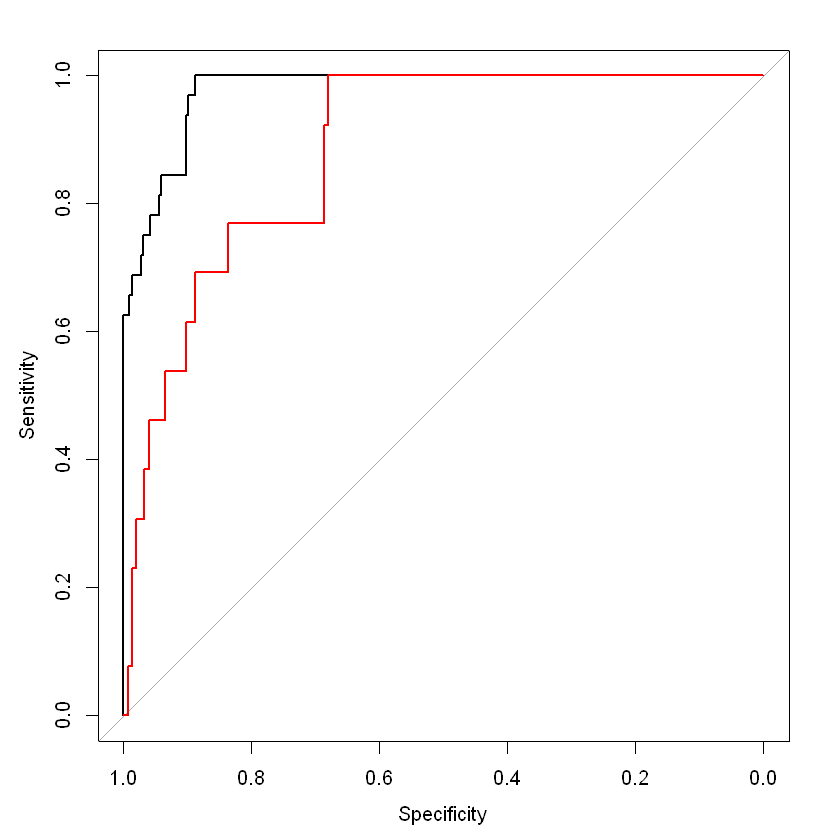

In [14]:
plot(ROC_train)
plot(ROC_test,add=TRUE,col="red")

### RANGER MODEL

In [15]:
rangermodelfit<-train(death_binary ~ .,
                      data=training,
                      method="ranger",
                      metric="ROC",
                      tuneLength=10,
                      trControl=fitControl)

rangermodelfit

predictions_train=predict(rangermodelfit,newdata=training)
predictions_test=predict(rangermodelfit,newdata=testing)
confusionMatrix(predict(rangermodelfit,training),training$death)
confusionMatrix(predict(rangermodelfit,testing),testing$death)

train_results=predict(rangermodelfit,training,type="prob")
test_results=predict(rangermodelfit,testing,type="prob")
train_results$obs=training$death
train_results$pred=predictions_train
test_results$obs=testing$death
test_results$pred=predictions_test
ROC_train<-roc(training$death,train_results[,"Death"],levels=c("Survive","Death"))
ROC_test<-roc(testing$death,test_results[,"Death"],levels=c("Survive","Death"))
ROC_train
ci.auc(ROC_train)
ROC_test
ci.auc(ROC_test)

Random Forest 

389 samples
221 predictors
  2 classes: 'Death', 'Survive' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 312, 310, 312, 312, 310, 311, ... 
Resampling results across tuning parameters:

  min.node.size  mtry  splitrule   ROC        Sens        Spec     
   4             168   gini        0.8034147  0.24095238  0.9860016
   5             217   extratrees  0.8310496  0.20476190  0.9955321
   6              19   extratrees  0.8704007  0.10285714  1.0000000
   7             125   extratrees  0.8436277  0.20476190  0.9966510
   8              25   gini        0.8430464  0.16190476  0.9988732
  10              27   extratrees  0.8613393  0.10952381  1.0000000
  12             118   gini        0.8051597  0.22952381  0.9915884
  15              74   extratrees  0.8468153  0.16095238  0.9977621
  16             117   gini        0.8048400  0.24095238  0.9899218
  20              24   extratrees  0.8661022  0.07904762  1.000

Confusion Matrix and Statistics

          Reference
Prediction Death Survive
   Death      26       0
   Survive     6     357
                                          
               Accuracy : 0.9846          
                 95% CI : (0.9667, 0.9943)
    No Information Rate : 0.9177          
    P-Value [Acc > NIR] : 9.081e-09       
                                          
                  Kappa : 0.8883          
                                          
 Mcnemar's Test P-Value : 0.04123         
                                          
            Sensitivity : 0.81250         
            Specificity : 1.00000         
         Pos Pred Value : 1.00000         
         Neg Pred Value : 0.98347         
             Prevalence : 0.08226         
         Detection Rate : 0.06684         
   Detection Prevalence : 0.06684         
      Balanced Accuracy : 0.90625         
                                          
       'Positive' Class : Death           
            

Confusion Matrix and Statistics

          Reference
Prediction Death Survive
   Death       2       0
   Survive    11     153
                                          
               Accuracy : 0.9337          
                 95% CI : (0.8845, 0.9665)
    No Information Rate : 0.9217          
    P-Value [Acc > NIR] : 0.344828        
                                          
                  Kappa : 0.251           
                                          
 Mcnemar's Test P-Value : 0.002569        
                                          
            Sensitivity : 0.15385         
            Specificity : 1.00000         
         Pos Pred Value : 1.00000         
         Neg Pred Value : 0.93293         
             Prevalence : 0.07831         
         Detection Rate : 0.01205         
   Detection Prevalence : 0.01205         
      Balanced Accuracy : 0.57692         
                                          
       'Positive' Class : Death           
            

Setting direction: controls < cases

Setting direction: controls < cases




Call:
roc.default(response = training$death, predictor = train_results[,     "Death"], levels = c("Survive", "Death"))

Data: train_results[, "Death"] in 357 controls (training$death Survive) < 32 cases (training$death Death).
Area under the curve: 1

Warning message in ci.auc.roc(ROC_train):
"ci.auc() of a ROC curve with AUC == 1 is always 1-1 and can be misleading."


95% CI: 1-1 (DeLong)


Call:
roc.default(response = testing$death, predictor = test_results[,     "Death"], levels = c("Survive", "Death"))

Data: test_results[, "Death"] in 153 controls (testing$death Survive) < 13 cases (testing$death Death).
Area under the curve: 0.8984

95% CI: 0.8288-0.9681 (DeLong)

### Plot ROC Curve for RANGER MODEL

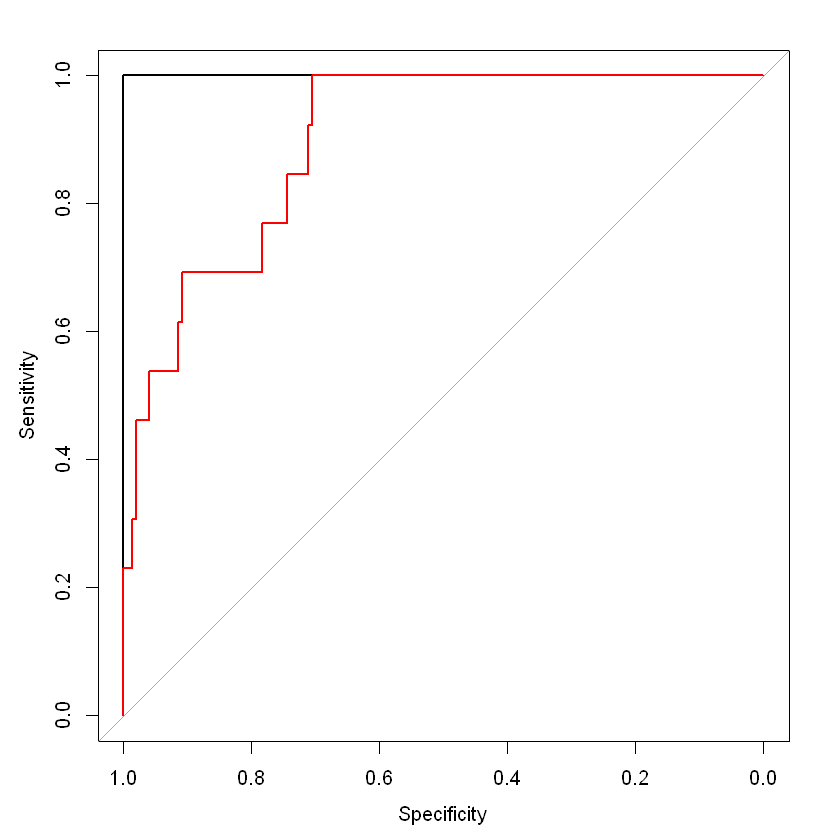

In [16]:
plot(ROC_train)
plot(ROC_test,add=TRUE,col="red")

### Neural network MODEL

In [17]:
nnetmodelfit<-train(death_binary ~ .,
                    data=training,
                    method="nnet",
                    metric="ROC",
                    tuneLength=10,
                    trControl=fitControl)

nnetmodelfit

predictions_train=predict(nnetmodelfit,newdata=training)
predictions_test=predict(nnetmodelfit,newdata=testing)
confusionMatrix(predict(nnetmodelfit,training),training$death_binary)
confusionMatrix(predict(nnetmodelfit,testing),testing$death_binary)

train_results=predict(nnetmodelfit,training,type="prob")
test_results=predict(nnetmodelfit,testing,type="prob")
train_results$obs=training$death_binary
train_results$pred=predictions_train
test_results$obs=testing$death_binary
test_results$pred=predictions_test
ROC_train<-roc(training$death_binary,train_results[,"Death"],levels=c("Survive","Death"))
ROC_test<-roc(testing$death_binary,test_results[,"Death"],levels=c("Survive","Death"))
ROC_train
ci.auc(ROC_train)
ROC_test
ci.auc(ROC_test)

Warning message:
"model fit failed for Fold1.Rep1: size=20, decay=4.861e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4461) weights
"


# weights:  224
initial  value 150.499733 
iter  10 value 61.109896
iter  20 value 40.619613
iter  30 value 21.871738
iter  40 value 15.020585
iter  50 value 13.641551
iter  60 value 11.457026
iter  70 value 8.665217
iter  80 value 8.493102
iter  90 value 8.477346
iter 100 value 8.476591
final  value 8.476591 
stopped after 100 iterations


Warning message:
"model fit failed for Fold1.Rep1: size=12, decay=7.820e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2677) weights
"
Warning message:
"model fit failed for Fold1.Rep1: size=10, decay=1.276e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"


# weights:  670
initial  value 354.588258 
iter  10 value 89.774074
iter  20 value 59.516015
iter  30 value 39.470636
iter  40 value 25.921624
iter  50 value 14.888124
iter  60 value 9.296908
iter  70 value 5.219036
iter  80 value 4.043604
iter  90 value 3.619284
iter 100 value 3.402738
final  value 3.402738 
stopped after 100 iterations


Warning message:
"model fit failed for Fold1.Rep1: size= 8, decay=1.706e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (1785) weights
"
Warning message:
"model fit failed for Fold1.Rep1: size=18, decay=8.957e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4015) weights
"
Warning message:
"model fit failed for Fold1.Rep1: size=11, decay=7.090e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2454) weights
"
Warning message:
"model fit failed for Fold1.Rep1: size=14, decay=1.258e-05 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (3123) weights
"
Warning message:
"model fit failed for Fold1.Rep1: size=10, decay=8.728e-04 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"
Warning message:
"model fit failed for Fold2.Rep1: size=20, decay=4.861e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4461) weights
"


# weights:  224
initial  value 138.137883 
iter  10 value 70.530757
iter  20 value 62.039695
iter  30 value 54.553333
iter  40 value 33.107815
iter  50 value 27.506744
iter  60 value 26.592388
iter  70 value 21.001539
iter  80 value 14.621762
iter  90 value 10.307837
iter 100 value 8.734782
final  value 8.734782 
stopped after 100 iterations


Warning message:
"model fit failed for Fold2.Rep1: size=12, decay=7.820e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2677) weights
"
Warning message:
"model fit failed for Fold2.Rep1: size=10, decay=1.276e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"


# weights:  670
initial  value 216.253060 
iter  10 value 40.495636
iter  20 value 25.941882
iter  30 value 12.929490
iter  40 value 7.455707
iter  50 value 5.367956
iter  60 value 4.475878
iter  70 value 4.077357
iter  80 value 3.575266
iter  90 value 3.187366
iter 100 value 3.037266
final  value 3.037266 
stopped after 100 iterations


Warning message:
"model fit failed for Fold2.Rep1: size= 8, decay=1.706e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (1785) weights
"
Warning message:
"model fit failed for Fold2.Rep1: size=18, decay=8.957e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4015) weights
"
Warning message:
"model fit failed for Fold2.Rep1: size=11, decay=7.090e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2454) weights
"
Warning message:
"model fit failed for Fold2.Rep1: size=14, decay=1.258e-05 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (3123) weights
"
Warning message:
"model fit failed for Fold2.Rep1: size=10, decay=8.728e-04 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"
Warning message:
"model fit failed for Fold3.Rep1: size=20, decay=4.861e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4461) weights
"


# weights:  224
initial  value 188.231326 
iter  10 value 91.390969
iter  20 value 52.221422
iter  30 value 35.964679
iter  40 value 28.084324
iter  50 value 19.880988
iter  60 value 15.678283
iter  70 value 13.962469
iter  80 value 12.687074
iter  90 value 12.557473
iter 100 value 12.556158
final  value 12.556158 
stopped after 100 iterations


Warning message:
"model fit failed for Fold3.Rep1: size=12, decay=7.820e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2677) weights
"
Warning message:
"model fit failed for Fold3.Rep1: size=10, decay=1.276e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"


# weights:  670
initial  value 392.618230 
iter  10 value 81.260528
iter  20 value 67.011657
iter  30 value 54.645667
iter  40 value 43.677278
iter  50 value 35.628070
iter  60 value 13.565510
iter  70 value 8.280001
iter  80 value 5.784735
iter  90 value 4.185592
iter 100 value 3.966453
final  value 3.966453 
stopped after 100 iterations


Warning message:
"model fit failed for Fold3.Rep1: size= 8, decay=1.706e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (1785) weights
"
Warning message:
"model fit failed for Fold3.Rep1: size=18, decay=8.957e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4015) weights
"
Warning message:
"model fit failed for Fold3.Rep1: size=11, decay=7.090e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2454) weights
"
Warning message:
"model fit failed for Fold3.Rep1: size=14, decay=1.258e-05 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (3123) weights
"
Warning message:
"model fit failed for Fold3.Rep1: size=10, decay=8.728e-04 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"
Warning message:
"model fit failed for Fold4.Rep1: size=20, decay=4.861e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4461) weights
"


# weights:  224
initial  value 178.767372 
iter  10 value 87.261248
iter  20 value 55.851999
iter  30 value 32.189847
iter  40 value 22.615202
iter  50 value 18.686356
iter  60 value 12.306010
iter  70 value 9.190191
iter  80 value 8.505023
iter  90 value 8.485325
iter 100 value 8.484586
final  value 8.484586 
stopped after 100 iterations


Warning message:
"model fit failed for Fold4.Rep1: size=12, decay=7.820e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2677) weights
"
Warning message:
"model fit failed for Fold4.Rep1: size=10, decay=1.276e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"


# weights:  670
initial  value 107.412790 
iter  10 value 61.651758
iter  20 value 40.872734
iter  30 value 28.200982
iter  40 value 22.152630
iter  50 value 18.525650
iter  60 value 13.612997
iter  70 value 9.012064
iter  80 value 5.626660
iter  90 value 4.373712
iter 100 value 3.654017
final  value 3.654017 
stopped after 100 iterations


Warning message:
"model fit failed for Fold4.Rep1: size= 8, decay=1.706e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (1785) weights
"
Warning message:
"model fit failed for Fold4.Rep1: size=18, decay=8.957e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4015) weights
"
Warning message:
"model fit failed for Fold4.Rep1: size=11, decay=7.090e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2454) weights
"
Warning message:
"model fit failed for Fold4.Rep1: size=14, decay=1.258e-05 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (3123) weights
"
Warning message:
"model fit failed for Fold4.Rep1: size=10, decay=8.728e-04 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"
Warning message:
"model fit failed for Fold5.Rep1: size=20, decay=4.861e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4461) weights
"


# weights:  224
initial  value 228.122653 
iter  10 value 86.172221
iter  20 value 62.343116
iter  30 value 56.062298
iter  40 value 50.178607
iter  50 value 41.810107
iter  60 value 36.382506
iter  70 value 32.487760
iter  80 value 27.612247
iter  90 value 26.992808
iter 100 value 21.682431
final  value 21.682431 
stopped after 100 iterations


Warning message:
"model fit failed for Fold5.Rep1: size=12, decay=7.820e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2677) weights
"
Warning message:
"model fit failed for Fold5.Rep1: size=10, decay=1.276e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"


# weights:  670
initial  value 220.326886 
iter  10 value 91.347079
iter  20 value 69.467447
iter  30 value 57.976613
iter  40 value 48.756069
iter  50 value 30.449140
iter  60 value 20.245393
iter  70 value 12.143457
iter  80 value 9.004038
iter  90 value 6.181453
iter 100 value 4.923297
final  value 4.923297 
stopped after 100 iterations


Warning message:
"model fit failed for Fold5.Rep1: size= 8, decay=1.706e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (1785) weights
"
Warning message:
"model fit failed for Fold5.Rep1: size=18, decay=8.957e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4015) weights
"
Warning message:
"model fit failed for Fold5.Rep1: size=11, decay=7.090e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2454) weights
"
Warning message:
"model fit failed for Fold5.Rep1: size=14, decay=1.258e-05 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (3123) weights
"
Warning message:
"model fit failed for Fold5.Rep1: size=10, decay=8.728e-04 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"
Warning message:
"model fit failed for Fold1.Rep2: size=20, decay=4.861e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4461) weights
"


# weights:  224
initial  value 167.302221 
iter  10 value 66.439463
iter  20 value 45.309649
iter  30 value 24.874318
iter  40 value 18.798745
iter  50 value 15.507669
iter  60 value 10.252516
iter  70 value 8.355822
iter  80 value 8.214659
iter  90 value 8.210322
final  value 8.210256 
converged


Warning message:
"model fit failed for Fold1.Rep2: size=12, decay=7.820e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2677) weights
"
Warning message:
"model fit failed for Fold1.Rep2: size=10, decay=1.276e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"


# weights:  670
initial  value 157.329095 
iter  10 value 54.968903
iter  20 value 37.416511
iter  30 value 26.452865
iter  40 value 19.937704
iter  50 value 15.169626
iter  60 value 10.029660
iter  70 value 7.796692
iter  80 value 6.253677
iter  90 value 5.029734
iter 100 value 3.322401
final  value 3.322401 
stopped after 100 iterations


Warning message:
"model fit failed for Fold1.Rep2: size= 8, decay=1.706e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (1785) weights
"
Warning message:
"model fit failed for Fold1.Rep2: size=18, decay=8.957e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4015) weights
"
Warning message:
"model fit failed for Fold1.Rep2: size=11, decay=7.090e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2454) weights
"
Warning message:
"model fit failed for Fold1.Rep2: size=14, decay=1.258e-05 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (3123) weights
"
Warning message:
"model fit failed for Fold1.Rep2: size=10, decay=8.728e-04 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"
Warning message:
"model fit failed for Fold2.Rep2: size=20, decay=4.861e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4461) weights
"


# weights:  224
initial  value 195.035338 
iter  10 value 87.315333
iter  20 value 40.748515
iter  30 value 29.500389
iter  40 value 23.719280
iter  50 value 19.086061
iter  60 value 17.473265
iter  70 value 12.285073
iter  80 value 11.366996
iter  90 value 11.325523
iter 100 value 11.323606
final  value 11.323606 
stopped after 100 iterations


Warning message:
"model fit failed for Fold2.Rep2: size=12, decay=7.820e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2677) weights
"
Warning message:
"model fit failed for Fold2.Rep2: size=10, decay=1.276e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"


# weights:  670
initial  value 209.714499 
iter  10 value 49.619773
iter  20 value 29.361256
iter  30 value 20.771976
iter  40 value 13.125009
iter  50 value 9.094948
iter  60 value 6.473492
iter  70 value 4.661593
iter  80 value 3.800893
iter  90 value 3.181649
iter 100 value 2.925078
final  value 2.925078 
stopped after 100 iterations


Warning message:
"model fit failed for Fold2.Rep2: size= 8, decay=1.706e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (1785) weights
"
Warning message:
"model fit failed for Fold2.Rep2: size=18, decay=8.957e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4015) weights
"
Warning message:
"model fit failed for Fold2.Rep2: size=11, decay=7.090e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2454) weights
"
Warning message:
"model fit failed for Fold2.Rep2: size=14, decay=1.258e-05 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (3123) weights
"
Warning message:
"model fit failed for Fold2.Rep2: size=10, decay=8.728e-04 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"
Warning message:
"model fit failed for Fold3.Rep2: size=20, decay=4.861e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4461) weights
"


# weights:  224
initial  value 189.468392 
iter  10 value 91.988560
iter  20 value 60.710990
iter  30 value 43.647989
iter  40 value 33.441463
iter  50 value 27.725942
iter  60 value 23.635829
iter  70 value 16.253760
iter  80 value 10.108256
iter  90 value 8.580611
iter 100 value 8.520266
final  value 8.520266 
stopped after 100 iterations


Warning message:
"model fit failed for Fold3.Rep2: size=12, decay=7.820e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2677) weights
"
Warning message:
"model fit failed for Fold3.Rep2: size=10, decay=1.276e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"


# weights:  670
initial  value 265.975093 
iter  10 value 92.731969
iter  20 value 56.903898
iter  30 value 30.468237
iter  40 value 23.081306
iter  50 value 17.849968
iter  60 value 12.350207
iter  70 value 8.209377
iter  80 value 6.462675
iter  90 value 4.572467
iter 100 value 3.832654
final  value 3.832654 
stopped after 100 iterations


Warning message:
"model fit failed for Fold3.Rep2: size= 8, decay=1.706e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (1785) weights
"
Warning message:
"model fit failed for Fold3.Rep2: size=18, decay=8.957e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4015) weights
"
Warning message:
"model fit failed for Fold3.Rep2: size=11, decay=7.090e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2454) weights
"
Warning message:
"model fit failed for Fold3.Rep2: size=14, decay=1.258e-05 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (3123) weights
"
Warning message:
"model fit failed for Fold3.Rep2: size=10, decay=8.728e-04 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"
Warning message:
"model fit failed for Fold4.Rep2: size=20, decay=4.861e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4461) weights
"


# weights:  224
initial  value 253.012415 
iter  10 value 87.290007
iter  20 value 69.591274
iter  30 value 64.068591
iter  40 value 57.497445
iter  50 value 51.075066
iter  60 value 44.812985
iter  70 value 40.606514
iter  80 value 29.847608
iter  90 value 23.548427
iter 100 value 23.029993
final  value 23.029993 
stopped after 100 iterations


Warning message:
"model fit failed for Fold4.Rep2: size=12, decay=7.820e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2677) weights
"
Warning message:
"model fit failed for Fold4.Rep2: size=10, decay=1.276e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"


# weights:  670
initial  value 142.511950 
iter  10 value 32.943974
iter  20 value 20.305295
iter  30 value 16.039694
iter  40 value 10.813306
iter  50 value 8.093215
iter  60 value 5.144442
iter  70 value 4.271232
iter  80 value 3.529507
iter  90 value 3.361630
iter 100 value 3.333990
final  value 3.333990 
stopped after 100 iterations


Warning message:
"model fit failed for Fold4.Rep2: size= 8, decay=1.706e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (1785) weights
"
Warning message:
"model fit failed for Fold4.Rep2: size=18, decay=8.957e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4015) weights
"
Warning message:
"model fit failed for Fold4.Rep2: size=11, decay=7.090e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2454) weights
"
Warning message:
"model fit failed for Fold4.Rep2: size=14, decay=1.258e-05 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (3123) weights
"
Warning message:
"model fit failed for Fold4.Rep2: size=10, decay=8.728e-04 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"
Warning message:
"model fit failed for Fold5.Rep2: size=20, decay=4.861e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4461) weights
"


# weights:  224
initial  value 180.700566 
iter  10 value 91.524073
iter  20 value 52.606472
iter  30 value 39.234161
iter  40 value 21.212284
iter  50 value 16.410687
iter  60 value 11.488124
iter  70 value 8.861074
iter  80 value 8.666137
iter  90 value 8.652720
final  value 8.652678 
converged


Warning message:
"model fit failed for Fold5.Rep2: size=12, decay=7.820e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2677) weights
"
Warning message:
"model fit failed for Fold5.Rep2: size=10, decay=1.276e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"


# weights:  670
initial  value 139.693144 
iter  10 value 66.789844
iter  20 value 55.348156
iter  30 value 49.161659
iter  40 value 46.632406
iter  50 value 28.247142
iter  60 value 17.499107
iter  70 value 9.545484
iter  80 value 7.576046
iter  90 value 5.707248
iter 100 value 4.432524
final  value 4.432524 
stopped after 100 iterations


Warning message:
"model fit failed for Fold5.Rep2: size= 8, decay=1.706e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (1785) weights
"
Warning message:
"model fit failed for Fold5.Rep2: size=18, decay=8.957e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4015) weights
"
Warning message:
"model fit failed for Fold5.Rep2: size=11, decay=7.090e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2454) weights
"
Warning message:
"model fit failed for Fold5.Rep2: size=14, decay=1.258e-05 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (3123) weights
"
Warning message:
"model fit failed for Fold5.Rep2: size=10, decay=8.728e-04 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"
Warning message:
"model fit failed for Fold1.Rep3: size=20, decay=4.861e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4461) weights
"


# weights:  224
initial  value 322.912393 
iter  10 value 92.211277
iter  20 value 60.955564
iter  30 value 49.090477
iter  40 value 39.562537
iter  50 value 22.420181
iter  60 value 16.720307
iter  70 value 15.247371
iter  80 value 10.648518
iter  90 value 8.806868
iter 100 value 8.540546
final  value 8.540546 
stopped after 100 iterations


Warning message:
"model fit failed for Fold1.Rep3: size=12, decay=7.820e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2677) weights
"
Warning message:
"model fit failed for Fold1.Rep3: size=10, decay=1.276e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"


# weights:  670
initial  value 331.564135 
iter  10 value 64.856538
iter  20 value 26.618230
iter  30 value 18.445249
iter  40 value 12.886837
iter  50 value 10.599887
iter  60 value 8.495685
iter  70 value 6.821355
iter  80 value 4.952307
iter  90 value 4.264207
iter 100 value 3.603792
final  value 3.603792 
stopped after 100 iterations


Warning message:
"model fit failed for Fold1.Rep3: size= 8, decay=1.706e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (1785) weights
"
Warning message:
"model fit failed for Fold1.Rep3: size=18, decay=8.957e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4015) weights
"
Warning message:
"model fit failed for Fold1.Rep3: size=11, decay=7.090e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2454) weights
"
Warning message:
"model fit failed for Fold1.Rep3: size=14, decay=1.258e-05 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (3123) weights
"
Warning message:
"model fit failed for Fold1.Rep3: size=10, decay=8.728e-04 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"
Warning message:
"model fit failed for Fold2.Rep3: size=20, decay=4.861e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4461) weights
"


# weights:  224
initial  value 168.865903 
iter  10 value 80.835780
iter  20 value 77.028785
iter  30 value 70.911803
iter  40 value 51.930515
iter  50 value 35.821186
iter  60 value 29.715668
iter  70 value 19.438810
iter  80 value 14.430507
iter  90 value 12.438858
iter 100 value 10.092850
final  value 10.092850 
stopped after 100 iterations


Warning message:
"model fit failed for Fold2.Rep3: size=12, decay=7.820e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2677) weights
"
Warning message:
"model fit failed for Fold2.Rep3: size=10, decay=1.276e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"


# weights:  670
initial  value 186.343204 
iter  10 value 61.248472
iter  20 value 49.113162
iter  30 value 26.488130
iter  40 value 19.877022
iter  50 value 12.517152
iter  60 value 7.620786
iter  70 value 4.886871
iter  80 value 4.030805
iter  90 value 3.332775
iter 100 value 3.207761
final  value 3.207761 
stopped after 100 iterations


Warning message:
"model fit failed for Fold2.Rep3: size= 8, decay=1.706e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (1785) weights
"
Warning message:
"model fit failed for Fold2.Rep3: size=18, decay=8.957e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4015) weights
"
Warning message:
"model fit failed for Fold2.Rep3: size=11, decay=7.090e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2454) weights
"
Warning message:
"model fit failed for Fold2.Rep3: size=14, decay=1.258e-05 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (3123) weights
"
Warning message:
"model fit failed for Fold2.Rep3: size=10, decay=8.728e-04 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"
Warning message:
"model fit failed for Fold3.Rep3: size=20, decay=4.861e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4461) weights
"


# weights:  224
initial  value 238.915656 
iter  10 value 74.379832
iter  20 value 61.990112
iter  30 value 53.021233
iter  40 value 37.342452
iter  50 value 29.105315
iter  60 value 25.914765
iter  70 value 18.813499
iter  80 value 15.123564
iter  90 value 13.043099
iter 100 value 11.363580
final  value 11.363580 
stopped after 100 iterations


Warning message:
"model fit failed for Fold3.Rep3: size=12, decay=7.820e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2677) weights
"
Warning message:
"model fit failed for Fold3.Rep3: size=10, decay=1.276e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"


# weights:  670
initial  value 203.014208 
iter  10 value 63.067159
iter  20 value 37.477722
iter  30 value 18.130069
iter  40 value 10.767954
iter  50 value 7.470125
iter  60 value 5.452418
iter  70 value 4.092216
iter  80 value 3.326763
iter  90 value 2.907054
iter 100 value 2.775173
final  value 2.775173 
stopped after 100 iterations


Warning message:
"model fit failed for Fold3.Rep3: size= 8, decay=1.706e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (1785) weights
"
Warning message:
"model fit failed for Fold3.Rep3: size=18, decay=8.957e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4015) weights
"
Warning message:
"model fit failed for Fold3.Rep3: size=11, decay=7.090e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2454) weights
"
Warning message:
"model fit failed for Fold3.Rep3: size=14, decay=1.258e-05 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (3123) weights
"
Warning message:
"model fit failed for Fold3.Rep3: size=10, decay=8.728e-04 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"
Warning message:
"model fit failed for Fold4.Rep3: size=20, decay=4.861e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4461) weights
"


# weights:  224
initial  value 294.505331 
iter  10 value 85.834772
iter  20 value 51.049213
iter  30 value 41.586819
iter  40 value 32.828839
iter  50 value 26.492384
iter  60 value 23.372743
iter  70 value 19.631624
iter  80 value 14.298375
iter  90 value 10.114384
iter 100 value 8.600647
final  value 8.600647 
stopped after 100 iterations


Warning message:
"model fit failed for Fold4.Rep3: size=12, decay=7.820e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2677) weights
"
Warning message:
"model fit failed for Fold4.Rep3: size=10, decay=1.276e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"


# weights:  670
initial  value 207.748128 
iter  10 value 75.757018
iter  20 value 40.912926
iter  30 value 30.838065
iter  40 value 19.850406
iter  50 value 12.513937
iter  60 value 7.701879
iter  70 value 5.148245
iter  80 value 4.104563
iter  90 value 3.512306
iter 100 value 3.098786
final  value 3.098786 
stopped after 100 iterations


Warning message:
"model fit failed for Fold4.Rep3: size= 8, decay=1.706e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (1785) weights
"
Warning message:
"model fit failed for Fold4.Rep3: size=18, decay=8.957e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4015) weights
"
Warning message:
"model fit failed for Fold4.Rep3: size=11, decay=7.090e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2454) weights
"
Warning message:
"model fit failed for Fold4.Rep3: size=14, decay=1.258e-05 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (3123) weights
"
Warning message:
"model fit failed for Fold4.Rep3: size=10, decay=8.728e-04 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"
Warning message:
"model fit failed for Fold5.Rep3: size=20, decay=4.861e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4461) weights
"


# weights:  224
initial  value 195.228151 
iter  10 value 90.847511
iter  20 value 45.867701
iter  30 value 26.932828
iter  40 value 21.112229
iter  50 value 18.291739
iter  60 value 17.208101
iter  70 value 14.687212
iter  80 value 12.658905
iter  90 value 11.614720
iter 100 value 10.986759
final  value 10.986759 
stopped after 100 iterations


Warning message:
"model fit failed for Fold5.Rep3: size=12, decay=7.820e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2677) weights
"
Warning message:
"model fit failed for Fold5.Rep3: size=10, decay=1.276e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"


# weights:  670
initial  value 127.812716 
iter  10 value 51.474625
iter  20 value 38.552027
iter  30 value 30.201023
iter  40 value 24.677983
iter  50 value 22.020654
iter  60 value 19.829629
iter  70 value 17.273533
iter  80 value 10.925569
iter  90 value 5.658741
iter 100 value 4.515715
final  value 4.515715 
stopped after 100 iterations


Warning message:
"model fit failed for Fold5.Rep3: size= 8, decay=1.706e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (1785) weights
"
Warning message:
"model fit failed for Fold5.Rep3: size=18, decay=8.957e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4015) weights
"
Warning message:
"model fit failed for Fold5.Rep3: size=11, decay=7.090e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2454) weights
"
Warning message:
"model fit failed for Fold5.Rep3: size=14, decay=1.258e-05 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (3123) weights
"
Warning message:
"model fit failed for Fold5.Rep3: size=10, decay=8.728e-04 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"
Warning message:
"model fit failed for Fold1.Rep4: size=20, decay=4.861e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4461) weights
"


# weights:  224
initial  value 212.018314 
iter  10 value 60.497283
iter  20 value 39.952168
iter  30 value 28.082456
iter  40 value 24.056259
iter  50 value 22.384040
iter  60 value 20.863083
iter  70 value 17.440687
iter  80 value 17.059094
iter  90 value 14.620710
iter 100 value 14.313562
final  value 14.313562 
stopped after 100 iterations


Warning message:
"model fit failed for Fold1.Rep4: size=12, decay=7.820e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2677) weights
"
Warning message:
"model fit failed for Fold1.Rep4: size=10, decay=1.276e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"


# weights:  670
initial  value 263.628831 
iter  10 value 45.130686
iter  20 value 33.018089
iter  30 value 24.129419
iter  40 value 13.506698
iter  50 value 8.707237
iter  60 value 7.138157
iter  70 value 5.492277
iter  80 value 4.363438
iter  90 value 3.476863
iter 100 value 3.126233
final  value 3.126233 
stopped after 100 iterations


Warning message:
"model fit failed for Fold1.Rep4: size= 8, decay=1.706e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (1785) weights
"
Warning message:
"model fit failed for Fold1.Rep4: size=18, decay=8.957e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4015) weights
"
Warning message:
"model fit failed for Fold1.Rep4: size=11, decay=7.090e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2454) weights
"
Warning message:
"model fit failed for Fold1.Rep4: size=14, decay=1.258e-05 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (3123) weights
"
Warning message:
"model fit failed for Fold1.Rep4: size=10, decay=8.728e-04 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"
Warning message:
"model fit failed for Fold2.Rep4: size=20, decay=4.861e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4461) weights
"


# weights:  224
initial  value 236.703002 
iter  10 value 88.512350
iter  20 value 54.627123
iter  30 value 35.438914
iter  40 value 25.150007
iter  50 value 18.999475
iter  60 value 16.565777
iter  70 value 13.703767
iter  80 value 13.612514
iter  90 value 13.610239
iter 100 value 13.610183
final  value 13.610183 
stopped after 100 iterations


Warning message:
"model fit failed for Fold2.Rep4: size=12, decay=7.820e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2677) weights
"
Warning message:
"model fit failed for Fold2.Rep4: size=10, decay=1.276e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"


# weights:  670
initial  value 188.170840 
iter  10 value 67.369187
iter  20 value 44.791997
iter  30 value 28.991767
iter  40 value 21.133301
iter  50 value 12.484483
iter  60 value 9.594318
iter  70 value 6.622732
iter  80 value 4.289308
iter  90 value 3.324475
iter 100 value 2.930589
final  value 2.930589 
stopped after 100 iterations


Warning message:
"model fit failed for Fold2.Rep4: size= 8, decay=1.706e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (1785) weights
"
Warning message:
"model fit failed for Fold2.Rep4: size=18, decay=8.957e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4015) weights
"
Warning message:
"model fit failed for Fold2.Rep4: size=11, decay=7.090e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2454) weights
"
Warning message:
"model fit failed for Fold2.Rep4: size=14, decay=1.258e-05 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (3123) weights
"
Warning message:
"model fit failed for Fold2.Rep4: size=10, decay=8.728e-04 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"
Warning message:
"model fit failed for Fold3.Rep4: size=20, decay=4.861e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4461) weights
"


# weights:  224
initial  value 194.496492 
iter  10 value 79.441581
iter  20 value 72.396771
iter  30 value 67.183907
iter  40 value 58.976256
iter  50 value 53.985970
iter  60 value 45.240970
iter  70 value 38.421839
iter  80 value 32.966151
iter  90 value 17.624086
iter 100 value 9.107915
final  value 9.107915 
stopped after 100 iterations


Warning message:
"model fit failed for Fold3.Rep4: size=12, decay=7.820e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2677) weights
"
Warning message:
"model fit failed for Fold3.Rep4: size=10, decay=1.276e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"


# weights:  670
initial  value 176.840839 
iter  10 value 69.008800
iter  20 value 44.274574
iter  30 value 28.431704
iter  40 value 20.601473
iter  50 value 12.251605
iter  60 value 6.684917
iter  70 value 4.164529
iter  80 value 3.420659
iter  90 value 2.897155
iter 100 value 2.629161
final  value 2.629161 
stopped after 100 iterations


Warning message:
"model fit failed for Fold3.Rep4: size= 8, decay=1.706e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (1785) weights
"
Warning message:
"model fit failed for Fold3.Rep4: size=18, decay=8.957e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4015) weights
"
Warning message:
"model fit failed for Fold3.Rep4: size=11, decay=7.090e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2454) weights
"
Warning message:
"model fit failed for Fold3.Rep4: size=14, decay=1.258e-05 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (3123) weights
"
Warning message:
"model fit failed for Fold3.Rep4: size=10, decay=8.728e-04 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"
Warning message:
"model fit failed for Fold4.Rep4: size=20, decay=4.861e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4461) weights
"


# weights:  224
initial  value 188.761081 
iter  10 value 89.670756
iter  20 value 69.840204
iter  30 value 67.002578
iter  40 value 66.372154
iter  50 value 64.532315
iter  60 value 54.479457
iter  70 value 51.014990
iter  80 value 40.581261
iter  90 value 28.999255
iter 100 value 20.141516
final  value 20.141516 
stopped after 100 iterations


Warning message:
"model fit failed for Fold4.Rep4: size=12, decay=7.820e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2677) weights
"
Warning message:
"model fit failed for Fold4.Rep4: size=10, decay=1.276e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"


# weights:  670
initial  value 256.673778 
iter  10 value 60.263617
iter  20 value 38.209730
iter  30 value 20.544171
iter  40 value 11.776852
iter  50 value 5.816540
iter  60 value 4.302554
iter  70 value 3.540274
iter  80 value 3.100157
iter  90 value 2.883276
iter 100 value 2.758848
final  value 2.758848 
stopped after 100 iterations


Warning message:
"model fit failed for Fold4.Rep4: size= 8, decay=1.706e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (1785) weights
"
Warning message:
"model fit failed for Fold4.Rep4: size=18, decay=8.957e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4015) weights
"
Warning message:
"model fit failed for Fold4.Rep4: size=11, decay=7.090e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2454) weights
"
Warning message:
"model fit failed for Fold4.Rep4: size=14, decay=1.258e-05 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (3123) weights
"
Warning message:
"model fit failed for Fold4.Rep4: size=10, decay=8.728e-04 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"
Warning message:
"model fit failed for Fold5.Rep4: size=20, decay=4.861e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4461) weights
"


# weights:  224
initial  value 156.836540 
iter  10 value 87.440764
iter  20 value 59.543821
iter  30 value 49.253244
iter  40 value 30.273701
iter  50 value 24.835877
iter  60 value 11.857075
iter  70 value 8.900131
iter  80 value 8.660664
iter  90 value 8.639999
iter 100 value 8.638524
final  value 8.638524 
stopped after 100 iterations


Warning message:
"model fit failed for Fold5.Rep4: size=12, decay=7.820e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2677) weights
"
Warning message:
"model fit failed for Fold5.Rep4: size=10, decay=1.276e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"


# weights:  670
initial  value 192.681105 
iter  10 value 54.949930
iter  20 value 40.027685
iter  30 value 26.679037
iter  40 value 19.836197
iter  50 value 15.123859
iter  60 value 12.031016
iter  70 value 7.403443
iter  80 value 6.331167
iter  90 value 5.227063
iter 100 value 4.508314
final  value 4.508314 
stopped after 100 iterations


Warning message:
"model fit failed for Fold5.Rep4: size= 8, decay=1.706e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (1785) weights
"
Warning message:
"model fit failed for Fold5.Rep4: size=18, decay=8.957e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4015) weights
"
Warning message:
"model fit failed for Fold5.Rep4: size=11, decay=7.090e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2454) weights
"
Warning message:
"model fit failed for Fold5.Rep4: size=14, decay=1.258e-05 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (3123) weights
"
Warning message:
"model fit failed for Fold5.Rep4: size=10, decay=8.728e-04 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"
Warning message:
"model fit failed for Fold1.Rep5: size=20, decay=4.861e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4461) weights
"


# weights:  224
initial  value 258.137171 
iter  10 value 88.777212
iter  20 value 68.841267
iter  30 value 56.982355
iter  40 value 50.147091
iter  50 value 40.048624
iter  60 value 30.161720
iter  70 value 24.061927
iter  80 value 21.299160
iter  90 value 12.365232
iter 100 value 11.387090
final  value 11.387090 
stopped after 100 iterations


Warning message:
"model fit failed for Fold1.Rep5: size=12, decay=7.820e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2677) weights
"
Warning message:
"model fit failed for Fold1.Rep5: size=10, decay=1.276e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"


# weights:  670
initial  value 387.856500 
iter  10 value 61.301536
iter  20 value 41.260836
iter  30 value 26.997564
iter  40 value 14.541377
iter  50 value 9.778460
iter  60 value 8.251410
iter  70 value 6.056427
iter  80 value 4.625171
iter  90 value 3.732028
iter 100 value 3.269274
final  value 3.269274 
stopped after 100 iterations


Warning message:
"model fit failed for Fold1.Rep5: size= 8, decay=1.706e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (1785) weights
"
Warning message:
"model fit failed for Fold1.Rep5: size=18, decay=8.957e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4015) weights
"
Warning message:
"model fit failed for Fold1.Rep5: size=11, decay=7.090e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2454) weights
"
Warning message:
"model fit failed for Fold1.Rep5: size=14, decay=1.258e-05 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (3123) weights
"
Warning message:
"model fit failed for Fold1.Rep5: size=10, decay=8.728e-04 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"
Warning message:
"model fit failed for Fold2.Rep5: size=20, decay=4.861e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4461) weights
"


# weights:  224
initial  value 241.960531 
iter  10 value 92.835509
iter  20 value 72.377950
iter  30 value 57.540138
iter  40 value 47.716669
iter  50 value 39.028273
iter  60 value 26.199979
iter  70 value 22.240538
iter  80 value 16.123291
iter  90 value 13.995793
iter 100 value 13.708043
final  value 13.708043 
stopped after 100 iterations


Warning message:
"model fit failed for Fold2.Rep5: size=12, decay=7.820e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2677) weights
"
Warning message:
"model fit failed for Fold2.Rep5: size=10, decay=1.276e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"


# weights:  670
initial  value 310.105100 
iter  10 value 70.216419
iter  20 value 64.612271
iter  30 value 55.527877
iter  40 value 41.186697
iter  50 value 30.679532
iter  60 value 21.768950
iter  70 value 12.869660
iter  80 value 7.595286
iter  90 value 5.171066
iter 100 value 3.927734
final  value 3.927734 
stopped after 100 iterations


Warning message:
"model fit failed for Fold2.Rep5: size= 8, decay=1.706e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (1785) weights
"
Warning message:
"model fit failed for Fold2.Rep5: size=18, decay=8.957e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4015) weights
"
Warning message:
"model fit failed for Fold2.Rep5: size=11, decay=7.090e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2454) weights
"
Warning message:
"model fit failed for Fold2.Rep5: size=14, decay=1.258e-05 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (3123) weights
"
Warning message:
"model fit failed for Fold2.Rep5: size=10, decay=8.728e-04 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"
Warning message:
"model fit failed for Fold3.Rep5: size=20, decay=4.861e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4461) weights
"


# weights:  224
initial  value 317.692092 
iter  10 value 60.810002
iter  20 value 45.803336
iter  30 value 28.953388
iter  40 value 19.504663
iter  50 value 16.207031
iter  60 value 10.303551
iter  70 value 8.346937
iter  80 value 8.196673
iter  90 value 8.192528
iter 100 value 8.192478
final  value 8.192478 
stopped after 100 iterations


Warning message:
"model fit failed for Fold3.Rep5: size=12, decay=7.820e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2677) weights
"
Warning message:
"model fit failed for Fold3.Rep5: size=10, decay=1.276e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"


# weights:  670
initial  value 342.810117 
iter  10 value 84.045222
iter  20 value 37.649001
iter  30 value 28.476700
iter  40 value 15.312612
iter  50 value 8.016729
iter  60 value 4.829635
iter  70 value 3.818712
iter  80 value 3.155572
iter  90 value 2.511994
iter 100 value 2.426843
final  value 2.426843 
stopped after 100 iterations


Warning message:
"model fit failed for Fold3.Rep5: size= 8, decay=1.706e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (1785) weights
"
Warning message:
"model fit failed for Fold3.Rep5: size=18, decay=8.957e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4015) weights
"
Warning message:
"model fit failed for Fold3.Rep5: size=11, decay=7.090e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2454) weights
"
Warning message:
"model fit failed for Fold3.Rep5: size=14, decay=1.258e-05 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (3123) weights
"
Warning message:
"model fit failed for Fold3.Rep5: size=10, decay=8.728e-04 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"
Warning message:
"model fit failed for Fold4.Rep5: size=20, decay=4.861e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4461) weights
"


# weights:  224
initial  value 200.464309 
iter  10 value 72.473626
iter  20 value 48.786366
iter  30 value 27.617003
iter  40 value 17.640817
iter  50 value 13.929179
iter  60 value 9.818716
iter  70 value 8.717665
iter  80 value 8.649691
iter  90 value 8.642894
iter 100 value 8.641836
final  value 8.641836 
stopped after 100 iterations


Warning message:
"model fit failed for Fold4.Rep5: size=12, decay=7.820e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2677) weights
"
Warning message:
"model fit failed for Fold4.Rep5: size=10, decay=1.276e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"


# weights:  670
initial  value 362.233047 
iter  10 value 48.251540
iter  20 value 33.115905
iter  30 value 15.716945
iter  40 value 9.452852
iter  50 value 5.362485
iter  60 value 4.044278
iter  70 value 3.539719
iter  80 value 3.357666
iter  90 value 3.318776
iter 100 value 3.310490
final  value 3.310490 
stopped after 100 iterations


Warning message:
"model fit failed for Fold4.Rep5: size= 8, decay=1.706e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (1785) weights
"
Warning message:
"model fit failed for Fold4.Rep5: size=18, decay=8.957e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4015) weights
"
Warning message:
"model fit failed for Fold4.Rep5: size=11, decay=7.090e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2454) weights
"
Warning message:
"model fit failed for Fold4.Rep5: size=14, decay=1.258e-05 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (3123) weights
"
Warning message:
"model fit failed for Fold4.Rep5: size=10, decay=8.728e-04 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"
Warning message:
"model fit failed for Fold5.Rep5: size=20, decay=4.861e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4461) weights
"


# weights:  224
initial  value 234.239589 
iter  10 value 70.748206
iter  20 value 61.637971
iter  30 value 55.954088
iter  40 value 51.865815
iter  50 value 48.931255
iter  60 value 36.835531
iter  70 value 22.185691
iter  80 value 17.724661
iter  90 value 15.756505
iter 100 value 14.135156
final  value 14.135156 
stopped after 100 iterations


Warning message:
"model fit failed for Fold5.Rep5: size=12, decay=7.820e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2677) weights
"
Warning message:
"model fit failed for Fold5.Rep5: size=10, decay=1.276e-01 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"


# weights:  670
initial  value 231.161139 
iter  10 value 76.781312
iter  20 value 46.651068
iter  30 value 36.394699
iter  40 value 21.300553
iter  50 value 13.317369
iter  60 value 6.383165
iter  70 value 4.708763
iter  80 value 4.194323
iter  90 value 3.929888
iter 100 value 3.562193
final  value 3.562193 
stopped after 100 iterations


Warning message:
"model fit failed for Fold5.Rep5: size= 8, decay=1.706e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (1785) weights
"
Warning message:
"model fit failed for Fold5.Rep5: size=18, decay=8.957e-02 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (4015) weights
"
Warning message:
"model fit failed for Fold5.Rep5: size=11, decay=7.090e+00 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2454) weights
"
Warning message:
"model fit failed for Fold5.Rep5: size=14, decay=1.258e-05 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (3123) weights
"
Warning message:
"model fit failed for Fold5.Rep5: size=10, decay=8.728e-04 Error in nnet.default(x, y, w, entropy = TRUE, ...) : 
  too many (2231) weights
"
Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."
Warning message in train.default(x, y, weights = w, .

# weights:  670
initial  value 307.071121 
iter  10 value 114.574227
iter  20 value 98.594503
iter  30 value 69.040004
iter  40 value 60.466029
iter  50 value 49.323733
iter  60 value 34.458602
iter  70 value 13.829736
iter  80 value 8.978872
iter  90 value 7.169316
iter 100 value 6.115740
final  value 6.115740 
stopped after 100 iterations


Neural Network 

389 samples
221 predictors
  2 classes: 'Death', 'Survive' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 311, 311, 312, 311, 311, 312, ... 
Resampling results across tuning parameters:

  size  decay         ROC        Sens       Spec     
   1    5.263823e-02  0.7746108  0.3609524  0.9417527
   3    2.084368e-02  0.7974952  0.3733333  0.9462520
   8    1.705789e+00        NaN        NaN        NaN
  10    8.727621e-04        NaN        NaN        NaN
  10    1.276378e-01        NaN        NaN        NaN
  11    7.090494e+00        NaN        NaN        NaN
  12    7.820381e-01        NaN        NaN        NaN
  14    1.257693e-05        NaN        NaN        NaN
  18    8.957219e-02        NaN        NaN        NaN
  20    4.860594e-02        NaN        NaN        NaN

ROC was used to select the optimal model using the largest value.
The final values used for the model were size = 3 and decay = 0.02084368.

Confusion Matrix and Statistics

          Reference
Prediction Death Survive
   Death      32       0
   Survive     0     357
                                     
               Accuracy : 1          
                 95% CI : (0.9906, 1)
    No Information Rate : 0.9177     
    P-Value [Acc > NIR] : 3.144e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.00000    
            Specificity : 1.00000    
         Pos Pred Value : 1.00000    
         Neg Pred Value : 1.00000    
             Prevalence : 0.08226    
         Detection Rate : 0.08226    
   Detection Prevalence : 0.08226    
      Balanced Accuracy : 1.00000    
                                     
       'Positive' Class : Death      
                                     

Confusion Matrix and Statistics

          Reference
Prediction Death Survive
   Death       5       8
   Survive     8     145
                                          
               Accuracy : 0.9036          
                 95% CI : (0.8482, 0.9439)
    No Information Rate : 0.9217          
    P-Value [Acc > NIR] : 0.8444          
                                          
                  Kappa : 0.3323          
                                          
 Mcnemar's Test P-Value : 1.0000          
                                          
            Sensitivity : 0.38462         
            Specificity : 0.94771         
         Pos Pred Value : 0.38462         
         Neg Pred Value : 0.94771         
             Prevalence : 0.07831         
         Detection Rate : 0.03012         
   Detection Prevalence : 0.07831         
      Balanced Accuracy : 0.66616         
                                          
       'Positive' Class : Death           
            

Setting direction: controls < cases

Setting direction: controls < cases




Call:
roc.default(response = training$death_binary, predictor = train_results[,     "Death"], levels = c("Survive", "Death"))

Data: train_results[, "Death"] in 357 controls (training$death_binary Survive) < 32 cases (training$death_binary Death).
Area under the curve: 1

Warning message in ci.auc.roc(ROC_train):
"ci.auc() of a ROC curve with AUC == 1 is always 1-1 and can be misleading."


95% CI: 1-1 (DeLong)


Call:
roc.default(response = testing$death_binary, predictor = test_results[,     "Death"], levels = c("Survive", "Death"))

Data: test_results[, "Death"] in 153 controls (testing$death_binary Survive) < 13 cases (testing$death_binary Death).
Area under the curve: 0.8467

95% CI: 0.7026-0.9907 (DeLong)

### Plot ROC Curve for NNET MODEL

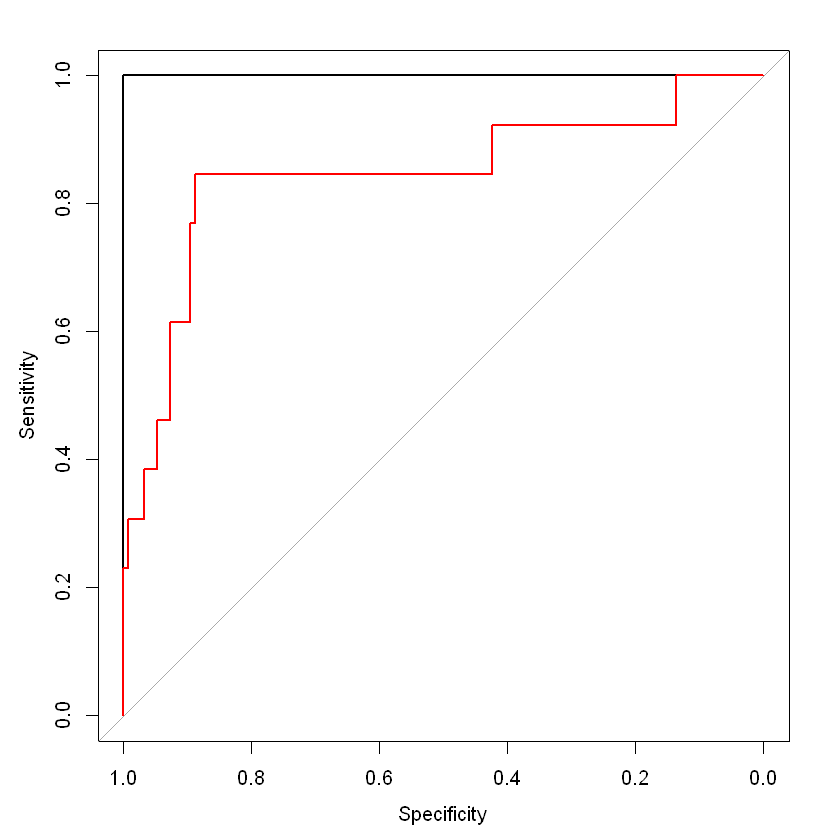

In [18]:
plot(ROC_train)
plot(ROC_test,add=TRUE,col="red")

### Visualizing neural networks

i<U+00A0>SHA-1 hash of file is 74c80bd5ddbc17ab3ae5ece9c0ed9beb612e87ef

載入需要的套件：reshape


載入套件：'reshape'


下列物件被遮斷自 'package:dplyr':

    rename


下列物件被遮斷自 'package:data.table':

    melt




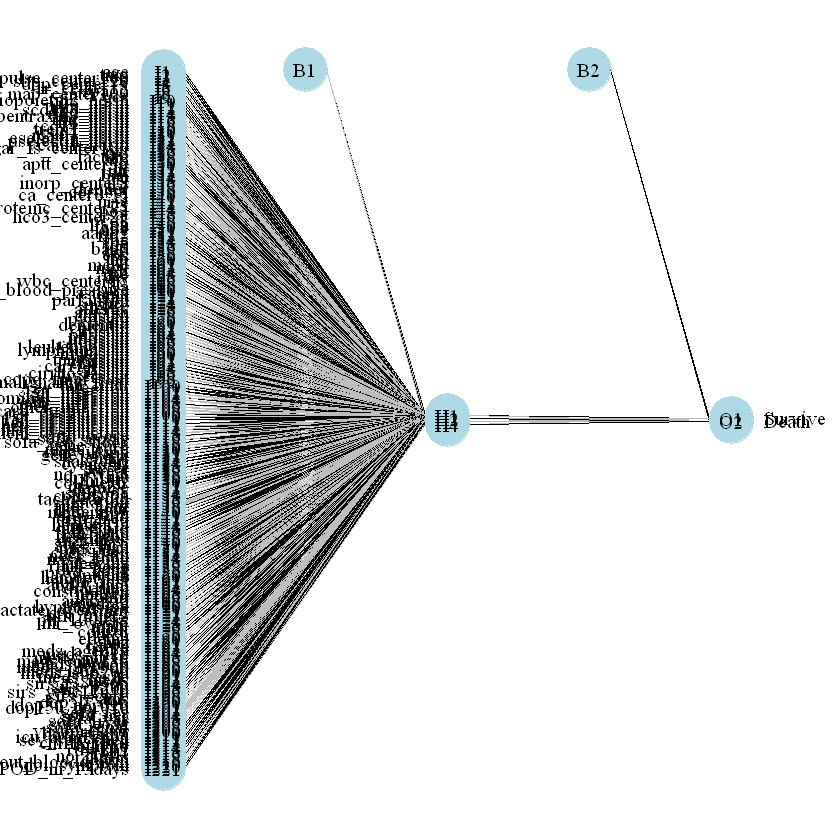

In [20]:
nnetmodelfit1<-neuralnet(death_binary ~ .,
                         data=training,
                         hidden=4)

source_url('https://gist.githubusercontent.com/fawda123/7471137/raw/466c1474d0a505ff044412703516c34f1a4684a5/nnet_plot_update.r')
par(mar=numeric(4),family='serif')
plot.nnet(nnetmodelfit1)

### Support vector machine MODEL

In [21]:
svmmodelfit<-train(death_binary ~ .,
                   data=training,
                   method="svmRadial",
                   metric="ROC",
                   tuneLength=10,
                   trControl=fitControl)

svmmodelfit

predictions_train=predict(svmmodelfit,newdata=training)
predictions_test=predict(svmmodelfit,newdata=testing)
confusionMatrix(predict(svmmodelfit,training),training$death)
confusionMatrix(predict(svmmodelfit,testing),testing$death)

train_results=predict(svmmodelfit,training,type="prob")
test_results=predict(svmmodelfit,testing,type="prob")
train_results$obs=training$death
train_results$pred=predictions_train
test_results$obs=testing$death
test_results$pred=predictions_test
ROC_train<-roc(training$death,train_results[,"Death"],levels=c("Survive","Death"))
ROC_test<-roc(testing$death,test_results[,"Death"],levels=c("Survive","Death"))
ROC_train
ci.auc(ROC_train)
ROC_test
ci.auc(ROC_test)

Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x,

Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x,

Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."
Warning message in .local(x,

Support Vector Machines with Radial Basis Function Kernel 

389 samples
221 predictors
  2 classes: 'Death', 'Survive' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 310, 311, 312, 311, 312, 312, ... 
Resampling results across tuning parameters:

  sigma        C             ROC        Sens        Spec     
  0.001119309    0.53340739  0.8796764  0.30190476  0.9837246
  0.002118651    7.09375703  0.8923897  0.21904762  0.9871205
  0.002329079   40.27182064  0.8848159  0.14095238  0.9899374
  0.002340036    0.37162787  0.8714796  0.30761905  0.9842723
  0.006806085  333.41244895  0.8800866  0.04476190  0.9893505
  0.011513395    5.70928699  0.8708423  0.03238095  0.9910329
  0.014806552    1.59286730  0.8671371  0.01333333  0.9960876
  0.018558047   29.49917971  0.8559870  0.02666667  0.9949531
  0.020383199    0.05575357  0.8563431  0.01333333  0.9977621
  0.021092788   18.49492439  0.8506424  0.01333333  0.9944053

ROC was used to 

Confusion Matrix and Statistics

          Reference
Prediction Death Survive
   Death      22       0
   Survive    10     357
                                          
               Accuracy : 0.9743          
                 95% CI : (0.9532, 0.9876)
    No Information Rate : 0.9177          
    P-Value [Acc > NIR] : 2.855e-06       
                                          
                  Kappa : 0.8015          
                                          
 Mcnemar's Test P-Value : 0.004427        
                                          
            Sensitivity : 0.68750         
            Specificity : 1.00000         
         Pos Pred Value : 1.00000         
         Neg Pred Value : 0.97275         
             Prevalence : 0.08226         
         Detection Rate : 0.05656         
   Detection Prevalence : 0.05656         
      Balanced Accuracy : 0.84375         
                                          
       'Positive' Class : Death           
            

Confusion Matrix and Statistics

          Reference
Prediction Death Survive
   Death       3       1
   Survive    10     152
                                          
               Accuracy : 0.9337          
                 95% CI : (0.8845, 0.9665)
    No Information Rate : 0.9217          
    P-Value [Acc > NIR] : 0.34483         
                                          
                  Kappa : 0.3282          
                                          
 Mcnemar's Test P-Value : 0.01586         
                                          
            Sensitivity : 0.23077         
            Specificity : 0.99346         
         Pos Pred Value : 0.75000         
         Neg Pred Value : 0.93827         
             Prevalence : 0.07831         
         Detection Rate : 0.01807         
   Detection Prevalence : 0.02410         
      Balanced Accuracy : 0.61212         
                                          
       'Positive' Class : Death           
            

Setting direction: controls < cases

Setting direction: controls < cases




Call:
roc.default(response = training$death, predictor = train_results[,     "Death"], levels = c("Survive", "Death"))

Data: train_results[, "Death"] in 357 controls (training$death Survive) < 32 cases (training$death Death).
Area under the curve: 1

Warning message in ci.auc.roc(ROC_train):
"ci.auc() of a ROC curve with AUC == 1 is always 1-1 and can be misleading."


95% CI: 1-1 (DeLong)


Call:
roc.default(response = testing$death, predictor = test_results[,     "Death"], levels = c("Survive", "Death"))

Data: test_results[, "Death"] in 153 controls (testing$death Survive) < 13 cases (testing$death Death).
Area under the curve: 0.8632

95% CI: 0.7221-1 (DeLong)

### Plot ROC Curve for SVM MODEL

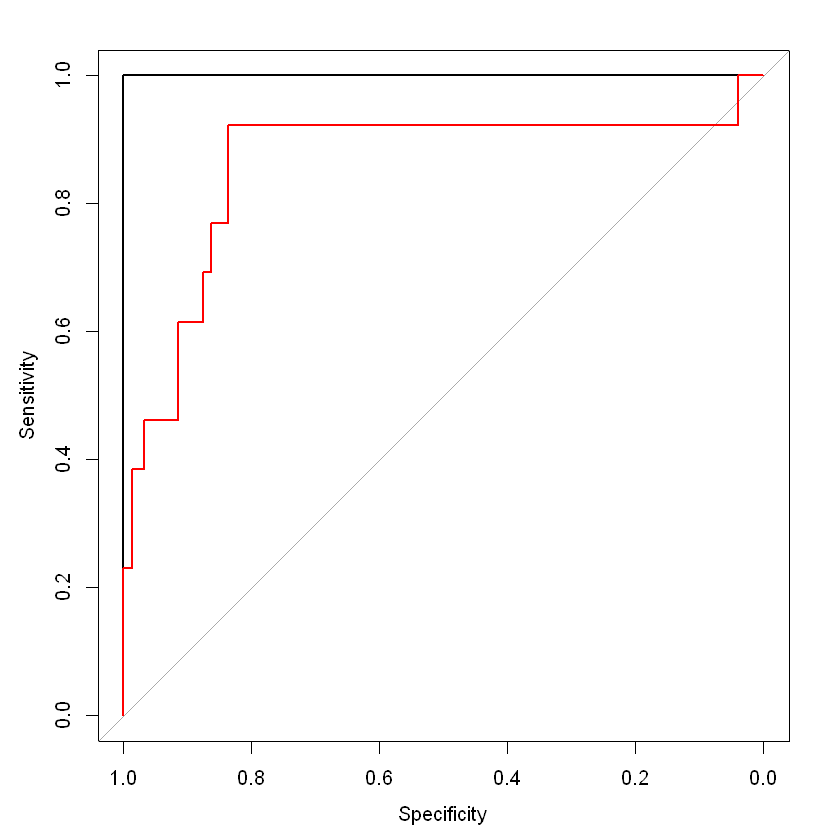

In [22]:
plot(ROC_train)
plot(ROC_test,add=TRUE,col="red")

### EXtreme Gradient Boosting MODEL

In [23]:
XgbTreemodelfit<-train(death_binary ~.,
                       data=training,
                       method="xgbTree",
                       metric="ROC",
                       tuneLength=10,
                       trControl=fitControl)

XgbTreemodelfit

predictions_train=predict(XgbTreemodelfit,newdata=training)
predictions_test=predict(XgbTreemodelfit,newdata=testing)
confusionMatrix(predict(XgbTreemodelfit,training),training$death)
confusionMatrix(predict(XgbTreemodelfit,testing),testing$death)

train_results=predict(XgbTreemodelfit,training,type="prob")
test_results=predict(XgbTreemodelfit,testing,type="prob")
train_results$obs=training$death
train_results$pred=predictions_train
test_results$obs=testing$death
test_results$pred=predictions_test
ROC_train<-roc(training$death,train_results[,"Death"],levels=c("Survive","Death"))
ROC_test<-roc(testing$death,test_results[,"Death"],levels=c("Survive","Death"))
ROC_train
ci.auc(ROC_train)
ROC_test
ci.auc(ROC_test)

eXtreme Gradient Boosting 

389 samples
221 predictors
  2 classes: 'Death', 'Survive' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 311, 310, 312, 312, 311, 312, ... 
Resampling results across tuning parameters:

  eta        max_depth  gamma      colsample_bytree  min_child_weight
  0.0779666  4          2.4714032  0.6496652          5              
  0.1316450  3          9.1523608  0.5003962          1              
  0.1474716  1          0.7574930  0.4237192          0              
  0.2725314  1          1.9523117  0.3508468         20              
  0.3579528  1          7.7262955  0.4969313          8              
  0.3599751  4          6.8368647  0.5617849          1              
  0.4047378  7          8.6042461  0.5689045          4              
  0.4797515  5          5.3716157  0.4543582          8              
  0.5552330  5          0.5947495  0.3284182         13              
  0.5904911  3          3.93323

Confusion Matrix and Statistics

          Reference
Prediction Death Survive
   Death      12       0
   Survive    20     357
                                          
               Accuracy : 0.9486          
                 95% CI : (0.9217, 0.9683)
    No Information Rate : 0.9177          
    P-Value [Acc > NIR] : 0.0128          
                                          
                  Kappa : 0.5241          
                                          
 Mcnemar's Test P-Value : 2.152e-05       
                                          
            Sensitivity : 0.37500         
            Specificity : 1.00000         
         Pos Pred Value : 1.00000         
         Neg Pred Value : 0.94695         
             Prevalence : 0.08226         
         Detection Rate : 0.03085         
   Detection Prevalence : 0.03085         
      Balanced Accuracy : 0.68750         
                                          
       'Positive' Class : Death           
            

Confusion Matrix and Statistics

          Reference
Prediction Death Survive
   Death       1       1
   Survive    12     152
                                          
               Accuracy : 0.9217          
                 95% CI : (0.8698, 0.9576)
    No Information Rate : 0.9217          
    P-Value [Acc > NIR] : 0.573105        
                                          
                  Kappa : 0.1148          
                                          
 Mcnemar's Test P-Value : 0.005546        
                                          
            Sensitivity : 0.076923        
            Specificity : 0.993464        
         Pos Pred Value : 0.500000        
         Neg Pred Value : 0.926829        
             Prevalence : 0.078313        
         Detection Rate : 0.006024        
   Detection Prevalence : 0.012048        
      Balanced Accuracy : 0.535194        
                                          
       'Positive' Class : Death           
            

Setting direction: controls < cases

Setting direction: controls < cases




Call:
roc.default(response = training$death, predictor = train_results[,     "Death"], levels = c("Survive", "Death"))

Data: train_results[, "Death"] in 357 controls (training$death Survive) < 32 cases (training$death Death).
Area under the curve: 0.9697

95% CI: 0.95-0.9894 (DeLong)


Call:
roc.default(response = testing$death, predictor = test_results[,     "Death"], levels = c("Survive", "Death"))

Data: test_results[, "Death"] in 153 controls (testing$death Survive) < 13 cases (testing$death Death).
Area under the curve: 0.8638

95% CI: 0.7777-0.9498 (DeLong)

### Plot ROC Curve for XGBoost MODEL

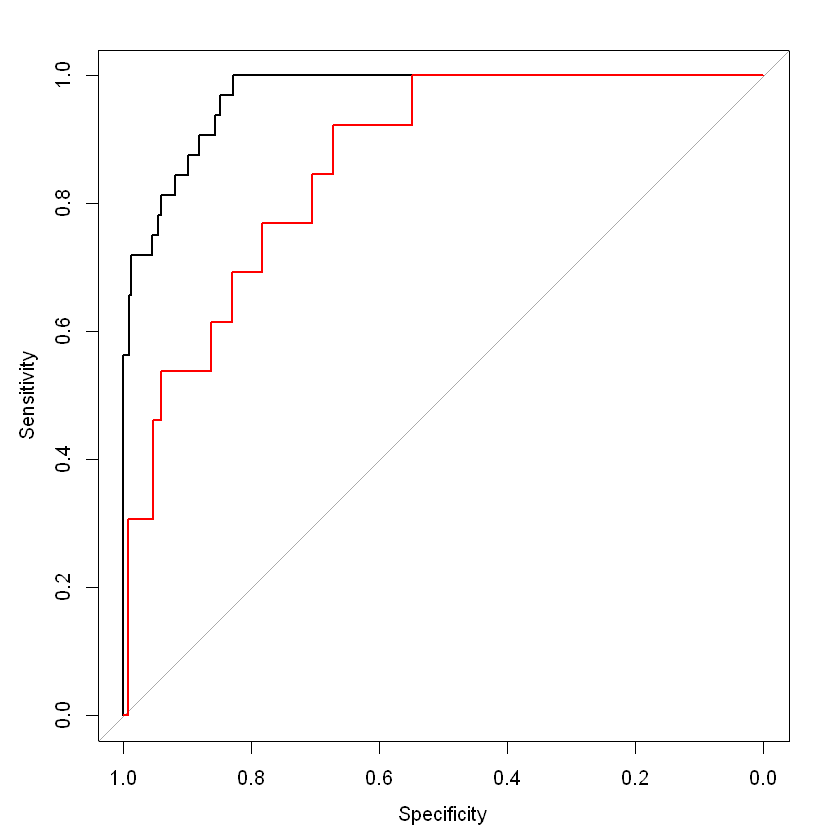

In [24]:
plot(ROC_train)
plot(ROC_test,add=TRUE,col="red")

### SHAP for XGBoost

sofa_score                  Na            il8_norm                 rbc 
        0.053247779         0.039020062         0.018025700         0.013124918 
               pco2           cd64_norm                 tmp        wbc_center15 
        0.011306161         0.011063898         0.006549215         0.004888404 
                age          icam1_norm       sbp_center120     pulse_center100 
        0.003526726         0.003470180         0.003230389         0.000000000 
       dbp_center75         rr_center18               spao2       map_center100 
        0.000000000         0.000000000         0.000000000         0.000000000 
                gcs  angiopoietin2_norm            il6_norm           tnfa_norm 
        0.000000000         0.000000000         0.000000000         0.000000000 
        scd163_norm           il10_norm     pentraxin3_norm           ifnr_norm 
        0.000000000         0.000000000         0.000000000         0.000000000 
          cd14_norm          trem1_norm      eselectin_norm      pselectin_norm 
        0.000000000         0.000000000         0.000000000         0.000000000 
         vcam1_norm  sugar_fs_center180                 pct                 crp 
        0.000000000         0.000000000         0.000000000         0.000000000 
            lactate                 alb       aptt_center30                  pt 
        0.000000000         0.000000000         0.000000000         0.000000000 
                inr                bilt                 bun                 ast 
        0.000000000         0.000000000         0.000000000         0.000000000 
      inorp_center3                 tro              ddimer            cortisol 
        0.000000000         0.000000000         0.000000000         0.000000000 
      ca_center8.75                  cl                uric                  c3 
        0.000000000         0.000000000         0.000000000         0.000000000 
  proteinc_center75                 po2                 sat       hco3_center25 
        0.000000000         0.000000000         0.000000000         0.000000000 
                 ph                tco2                 abe               aado2 
        0.000000000         0.000000000         0.000000000         0.000000000 
               fio2                 sbc                 sbe                 fdp 
        0.000000000         0.000000000         0.000000000         0.000000000 
               band                 cre                 eos                  hb 
        0.000000000         0.000000000         0.000000000         0.000000000 
                hct                mchc                 mcv                 plt 
        0.000000000         0.000000000         0.000000000         0.000000000 
                rdw                   K high_blood_pressure              asthma 
        0.000000000         0.000000000         0.000000000         0.000000000 
               gout           parkinson                 hiv              stroke 
        0.000000000         0.000000000         0.000000000         0.000000000 
            allergy               misum              chfsum              pvdsum 
        0.000000000         0.000000000         0.000000000         0.000000000 
              cdsum            dementia              cpdsum               rdsum 
        0.000000000         0.000000000         0.000000000         0.000000000 
             pudsum              mldsum              hopsum            renalsum 
        0.000000000         0.000000000         0.000000000         0.000000000 
        leukemiasum         lymphomasum             msldsum              mstsum 
        0.000000000         0.000000000         0.000000000         0.000000000 
           tumorsum              ckdsum          carriersum               flsum 
        0.000000000         0.000000000         0.000000000         0.000000000 
       cirrhosissum            liversum      copd_final_sum    malignancy_final 
        0.000000000         0.000000000 

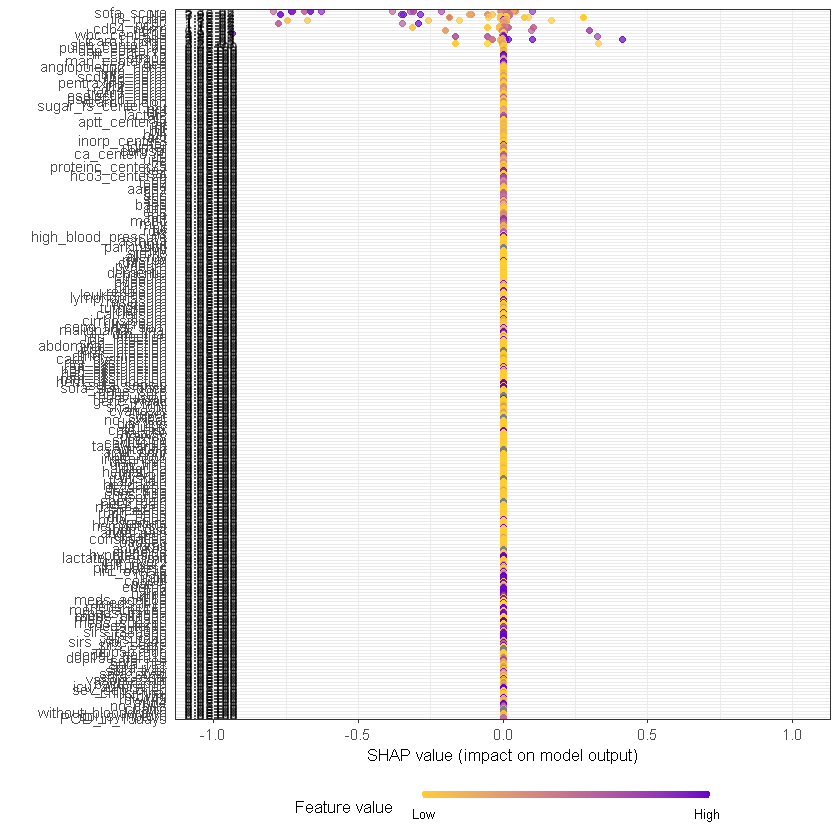

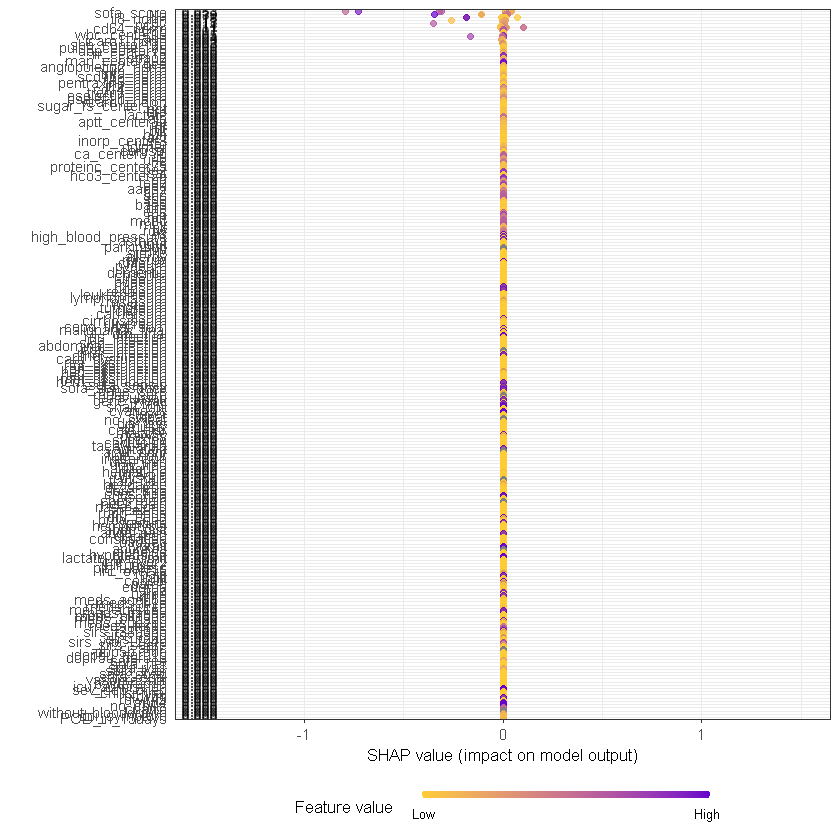

In [25]:
train_X = as.matrix(training[,-222])
mod1 = xgboost::xgboost(data = train_X,
                        label = training$death_binary,
                        gamma = 0,
                        eta = 1,
                        lambda = 0,
                        nrounds = 1,
                        verbose = FALSE)

# shap.values(model, X_dataset) returns the SHAP
# data matrix and ranked features by mean|SHAP|
shap_values <- shap.values(xgb_model = mod1, X_train = train_X)
shap_values$mean_shap_score
shap_values_sepsis <- shap_values$shap_score

# shap.prep() returns the long-format SHAP data from either model or
shap_long_sepsis <- shap.prep(xgb_model = mod1, X_train = train_X)
# is the same as: using given shap_contrib
shap_long_sepsis <- shap.prep(shap_contrib = shap_values_sepsis, X_train = train_X)

# **SHAP summary plot**
shap.plot.summary(shap_long_sepsis, scientific = TRUE)
shap.plot.summary(shap_long_sepsis, x_bound  = 1.5, dilute = 10)

### Alternatives options to make the same plot:

#### option 1: from the xgboost model

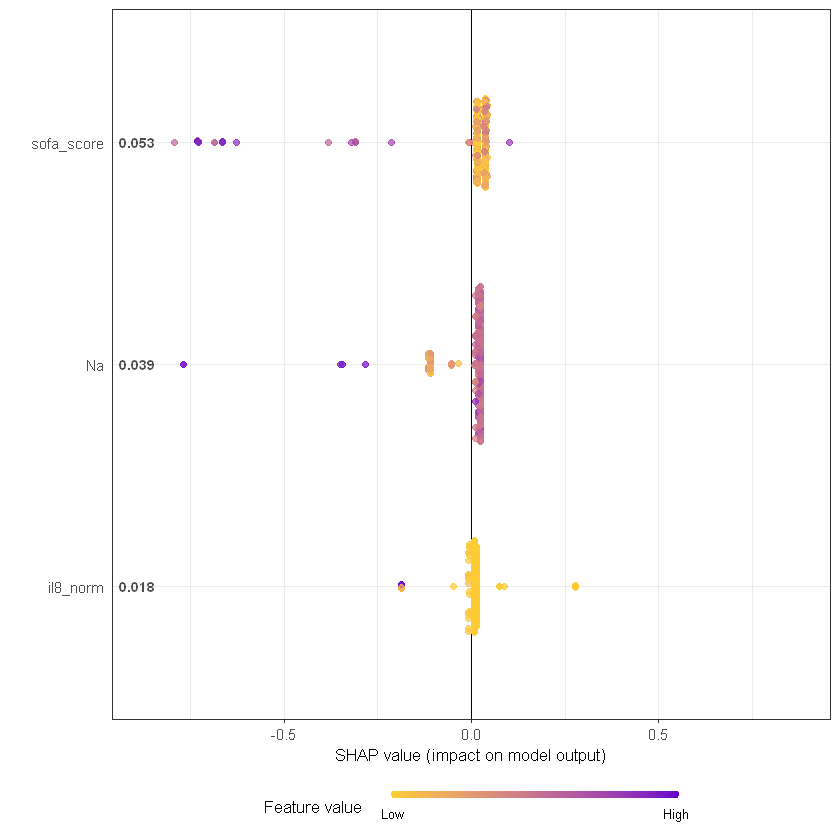

In [26]:
shap.plot.summary.wrap1(mod1, X = as.matrix(training[,-222]), top_n = 3)

#### option 2: supply a self-made SHAP values dataset

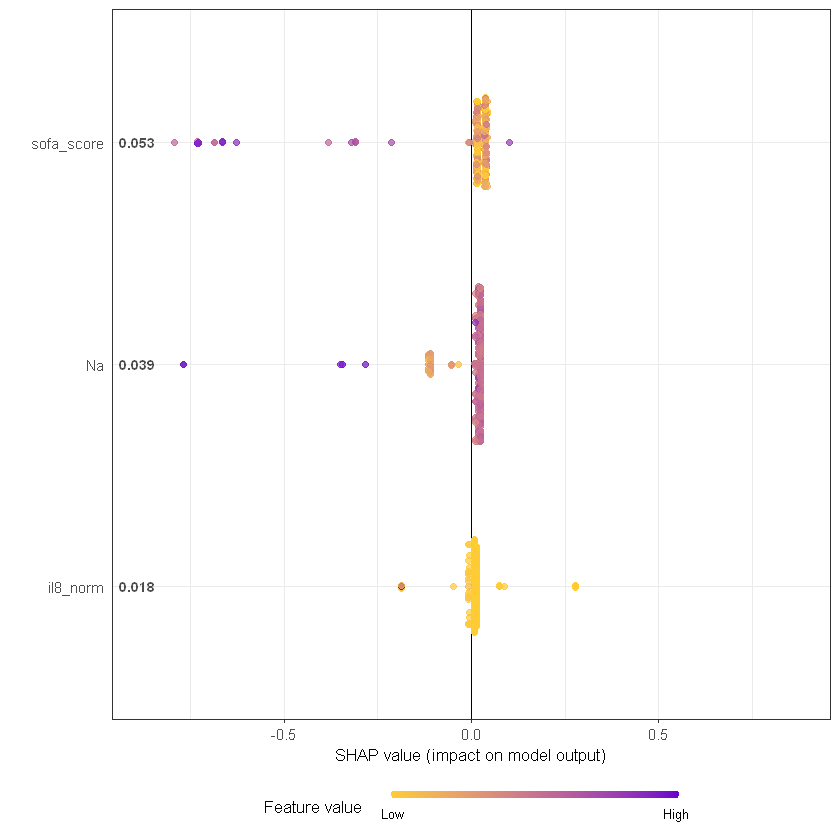

In [27]:
shap.plot.summary.wrap2(shap_score = shap_values_sepsis, X = train_X, top_n = 3)